# <font color='#ED45A6'> MD004 ENTREGA6 ANÁLISIS DE COMPONENTES PRINCIPALES </font>

**Descripción de la tarea:**

El fichero 20230119_DatosBoston incluye datos de precios del mercado de viviendas de Boston (median_value), así como datos adicionales sobre la ubicación de la vivienda y otros datos sociodemográficos. La descripción de las columnas del dataset es la que sigue:

- **crime_index**: Índice de criminalidad de la zona
- **urban_ratio**: Ratio de zona urbana residencial sobre el total
- **industry_ratio**: Ratio de industria de la zona
- **c_river_variable**: 1 si la zona colinda con un río y 0 si no
- **nox_concentration**: Concentración de óxido nitroso en la zona
- **rooms_per_dwelling**: Número de habitaciones medio por vivienda
- **dwelling_age**: “Edad” media de la vivienda
- **dwelling_dist**: Distancia media ponderada con los centros urbanos de la ciudad
- **highway_index**: Índice de accesibilidad sobre autopistas cercanas
- **tax_ratio**: Índice de tasas por cada 10000usd
- **teacher_ratio**: Ratio de alumno por profesor
- **racial_index**: Índice de proporción de población no caucásica
- **lower_status**: Porcentaje de población de “clase-baja”
- **median_value**: Valor medio de precio de la vivienda (En 1000USD)

**Se pide:**

1. **Visualización y familiarización del dataset (2p)**: Se valorará el uso de las técnicas empleadas, así como la explicación de las visualizaciones / estadísticos utilizados en clases anteriores.
2. **Análisis de correlación y de componentes principales (3p)**: Se valorará principalmente la interpretación de dichos análisis así como la “limpieza” de la presentación
3. **Análisis de ANOVA (2p)**: Se valorará principalmente la interpretación del análisis, así como la limpieza de los datos
4. **Desarrollo y justificación de las variables (1p)**: En base a las conclusiones sacadas en los puntos 1, 2, y 3 ¿Qué variables debemos utilizar en nuestro modelo de regresión lineal?
5. **Estudio de regresión lineal del median_value (2p)**: ¿Qué resultados obtenemos en el modelo?,  ¿Predice correctamente?, ¿Utilizarías este modelo en la vida real?  


In [4]:
library(dplyr)
library(MASS)
library(class)
library(corrplot)
library(ggplot2)
#install.packages('gridExtra')
library(gridExtra)
#install.packages ('GGally')
library(GGally)
#install.packages('nortest')
library(nortest)
library(caret)
library(MASS)
library(lmtest)
#install.packages("olsrr")
library(olsrr)
#install.packages("car")
library(car)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


corrplot 0.92 loaded


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: lattice

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'olsrr'


The following object is masked from 'package:MASS':

    cement


The following object is masked from 'package:datasets':

    rivers


Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode




# <font color='#ED45A6'>  CARGA DE DATOS </font>

- Variable dependiente (target) **crime_index: Índice de criminalidad de la zona**
- Variables explicativas o predictoras:

· urban_ratio: Ratio de zona urbana residencial sobre el total

· industry_ratio: Ratio de industria de la zona

· c_river_variable: 1 si la zona colinda con un río y 0 si no

· nox_concentration: Concentración de óxido nitroso en la zona

· rooms_per_dwelling: Número de habitaciones medio por vivienda

· dwelling_age: “Edad” media de la vivienda

· dwelling_dist: Distancia media ponderada con los centros urbanos de la ciudad

· highway_index: Índice de accesibilidad sobre autopistas cercanas

· tax_ratio: Índice de tasas por cada 10000usd

· teacher_ratio: Ratio de alumno por profesor

· racial_index: Índice de proporción de población no caucásica

· lower_status: Porcentaje de población de “clase-baja”

· median_value: Valor medio de precio de la vivienda (En 1000USD)

In [5]:
#subimos el fichero 20230119_DatosBoston a nuestro entorno jupyter 
#carpeta donde vayamos a desarrollar el código
#cargamos nuestro dataset en data_ab y checkeamos los datos cargados

data = read.csv(file='20230119_DatosBoston.csv', header=TRUE, sep=';', dec=',')
head(data)#de forma predefinida retorna las primeras 6 observations
tail(data)#de forma predefinida retorna las últimas 6 observations

,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,49.671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,49.671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,60.622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,60.622,3,222,18.7,396.9,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.43,58.7,60.622,3,222,18.7,394.12,5.21,28.7


,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
501,0.22438,0,9.69,0,0.585,6.027,79.7,24.982,6,391,19.2,396.9,14.33,16.8
502,0.06263,0,11.93,0,0.573,6.593,69.1,24.786,1,273,21,391.99,9.67,22.4
503,0.04527,0,11.93,0,0.573,6.12,76.7,22.875,1,273,21,396.9,9.08,20.6
504,0.06076,0,11.93,0,0.573,6.976,91,21.675,1,273,21,396.9,5.64,23.9
505,0.10959,0,11.93,0,0.573,6.794,89.3,23.889,1,273,21,393.45,6.48,22
506,0.04741,0,11.93,0,0.573,6.03,80.8,2.505,1,273,21,396.9,7.88,11.9


1. Visualización y familiarización del dataset (2p): Se valorará el uso de las técnicas empleadas, así como la explicación de las visualizaciones/estadísticas utilizados en clases anteriores.

In [6]:
str(data) 

'data.frame':	506 obs. of  14 variables:
 $ crime_index       : chr  "0.00632" "0.02731" "0.02729" "0.03237" ...
 $ urban_ratio       : chr  "18" "0" "0" "0" ...
 $ industry_ratio    : chr  "2.31" "7.07" "7.07" "2.18" ...
 $ c_river_variable  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox_concentration : chr  "0.538" "0.469" "0.469" "0.458" ...
 $ rooms_per_dwelling: chr  "6.575" "6.421" "7.185" "6.998" ...
 $ dwelling_age      : chr  "65.2" "78.9" "61.1" "45.8" ...
 $ dwelling_dist     : chr  "4.09" "49.671" "49.671" "60.622" ...
 $ highway_index     : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax_ratio         : int  296 242 242 222 222 222 311 311 311 311 ...
 $ teacher_ratio     : chr  "15.3" "17.8" "17.8" "18.7" ...
 $ racial_index      : chr  "396.9" "396.9" "392.83" "394.63" ...
 $ lower_status      : chr  "4.98" "9.14" "4.03" "2.94" ...
 $ median_value      : chr  "24" "21.6" "34.7" "33.4" ...


In [7]:
sum(is.na(data))# Núm de NA #comprobar si existen valores nulls

[1] 0

In [8]:
char_columns <- sapply(data, is.character)
data[char_columns] <- lapply(data[char_columns], as.numeric)
data

crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,49.671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,49.671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,60.622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,60.622,3,222,18.7,396.90,5.33,36.2
0.02985,0.0,2.18,0,0.458,6.430,58.7,60.622,3,222,18.7,394.12,5.21,28.7
0.08829,12.5,7.87,0,0.524,6.012,66.6,55.605,5,311,15.2,395.60,12.43,22.9
0.14455,12.5,7.87,0,0.524,6.172,96.1,59.505,5,311,15.2,396.90,19.15,27.1
0.21124,12.5,7.87,0,0.524,5.631,100.0,60.821,5,311,15.2,386.63,29.93,16.5


In [9]:
data$rooms_per_dwelling <- as.integer(data$rooms_per_dwelling)
data

crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18.0,2.31,0,0.538,6,65.2,4.090,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6,78.9,49.671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7,61.1,49.671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6,45.8,60.622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7,54.2,60.622,3,222,18.7,396.90,5.33,36.2
0.02985,0.0,2.18,0,0.458,6,58.7,60.622,3,222,18.7,394.12,5.21,28.7
0.08829,12.5,7.87,0,0.524,6,66.6,55.605,5,311,15.2,395.60,12.43,22.9
0.14455,12.5,7.87,0,0.524,6,96.1,59.505,5,311,15.2,396.90,19.15,27.1
0.21124,12.5,7.87,0,0.524,5,100.0,60.821,5,311,15.2,386.63,29.93,16.5


In [10]:
data$dwelling_age <- as.integer(data$dwelling_age)
data

crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18.0,2.31,0,0.538,6,65,4.090,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6,78,49.671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7,61,49.671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6,45,60.622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7,54,60.622,3,222,18.7,396.90,5.33,36.2
0.02985,0.0,2.18,0,0.458,6,58,60.622,3,222,18.7,394.12,5.21,28.7
0.08829,12.5,7.87,0,0.524,6,66,55.605,5,311,15.2,395.60,12.43,22.9
0.14455,12.5,7.87,0,0.524,6,96,59.505,5,311,15.2,396.90,19.15,27.1
0.21124,12.5,7.87,0,0.524,5,100,60.821,5,311,15.2,386.63,29.93,16.5


In [11]:
summary(data)

  crime_index        urban_ratio     industry_ratio  c_river_variable 
 Min.   :  0.0063   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.:  0.0820   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median :  0.2565   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   :131.6957   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.:143.3370   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :996.6540   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
 nox_concentration rooms_per_dwelling  dwelling_age    dwelling_dist    
 Min.   :0.3850    Min.   :3.000      Min.   :  2.00   Min.   :  1.137  
 1st Qu.:0.4490    1st Qu.:5.000      1st Qu.: 45.00   1st Qu.: 17.930  
 Median :0.5380    Median :6.000      Median : 77.00   Median : 27.533  
 Mean   :0.5547    Mean   :5.777      Mean   : 68.16   Mean   : 33.837  
 3rd Qu.:0.6240    3rd Qu.:6.000      3rd Qu.: 94.00   3rd Qu.: 47.648  
 Max.   :0.8710    Max.   :8.000      Max.   :100.00   Max.   :12

# <font color='#ED45A6'>  VARIABLE OBJETIVO </font>

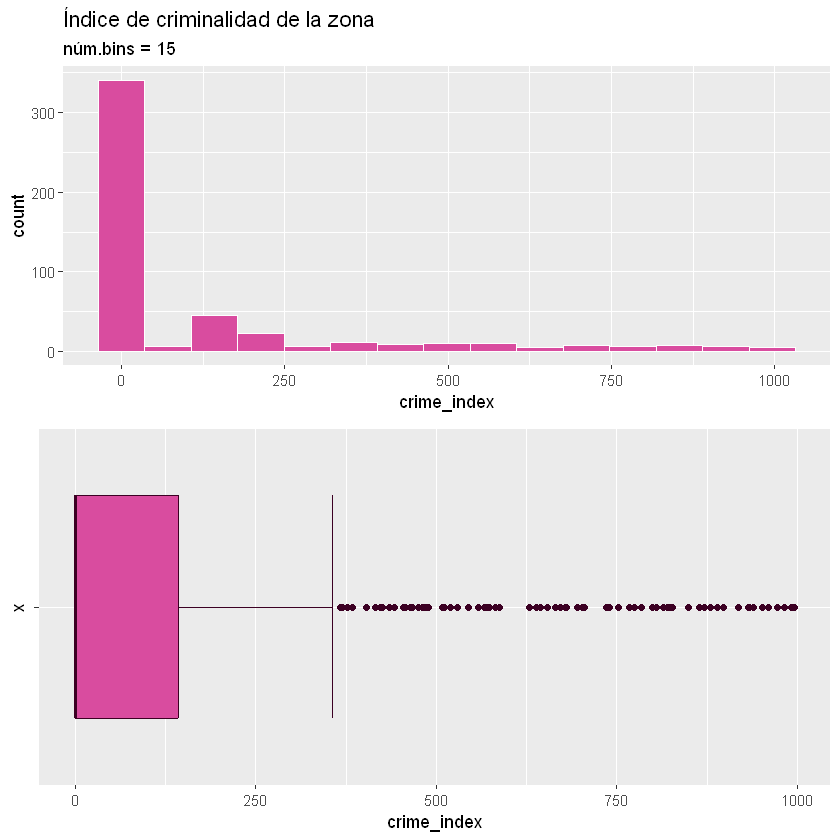

In [12]:
a= ggplot(data) + #señalamos el dataframe
  aes(x = crime_index) + #indicamos la variable 
  geom_histogram(bins = 15 ,fill = "#d94c9f",color = "white") + #color del contorno
  labs(title="Índice de criminalidad de la zona"  ,subtitle = "núm.bins = 15",x = "crime_index")  #nombre variable eje x
b= ggplot(data = data, aes(x = "", y = crime_index)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() # Boxplot horizontal
grid.arrange(a,b)

# <font color='#ED45A6'>  VARIABLES EXPLICATIVAS </font>

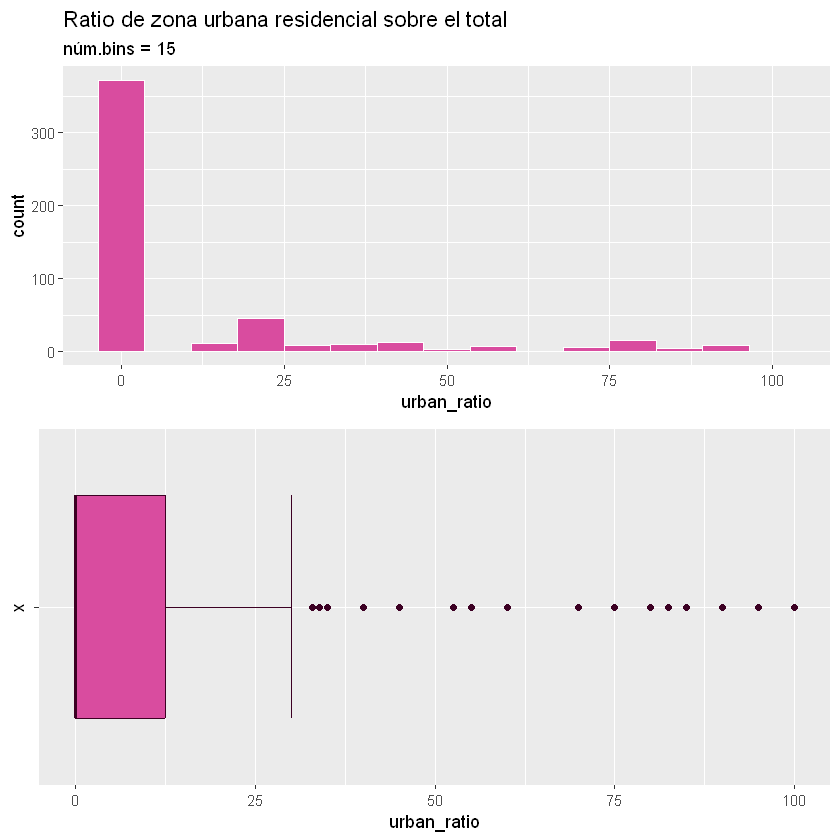

In [13]:
a= ggplot(data) + 
  aes(x = urban_ratio) + 
  geom_histogram(bins = 15 ,fill = "#d94c9f",color = "white") + 
  labs(title="Ratio de zona urbana residencial sobre el total"  ,subtitle = "núm.bins = 15",x = "urban_ratio")  
b= ggplot(data = data, aes(x = "", y = urban_ratio)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() # Boxplot horizontal
grid.arrange(a,b)

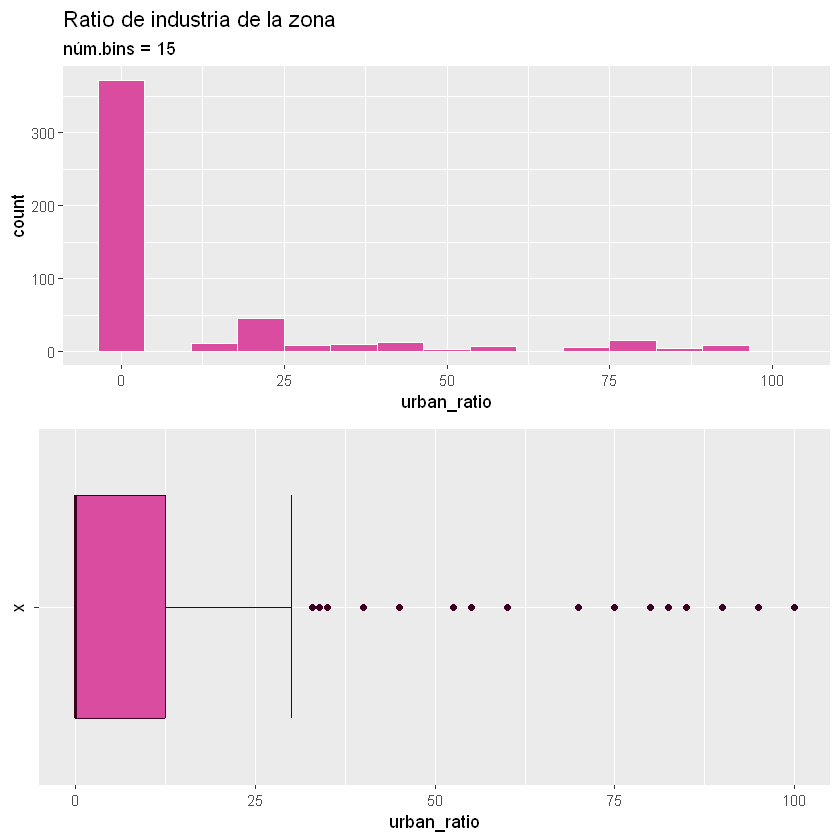

In [14]:
a= ggplot(data) + 
  aes(x = urban_ratio) + 
  geom_histogram(bins = 15 ,fill = "#d94c9f",color = "white") + 
  labs(title="Ratio de industria de la zona"  ,subtitle = "núm.bins = 15",x = "urban_ratio")  
b= ggplot(data = data, aes(x = "", y = urban_ratio)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() # Boxplot horizontal
grid.arrange(a,b)

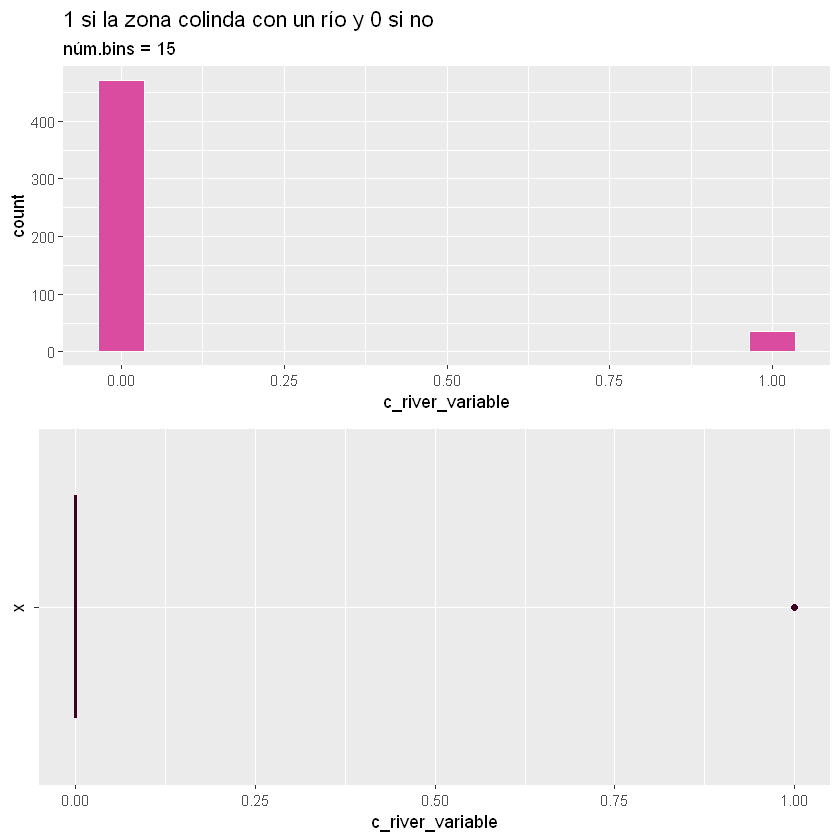

In [15]:
a= ggplot(data) + 
  aes(x = c_river_variable) + 
  geom_histogram(bins = 15 ,fill = "#d94c9f",color = "white") + 
  labs(title="1 si la zona colinda con un río y 0 si no"  ,subtitle = "núm.bins = 15",x = "c_river_variable")  
b= ggplot(data = data, aes(x = "", y = c_river_variable)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() # Boxplot horizontal
grid.arrange(a,b)

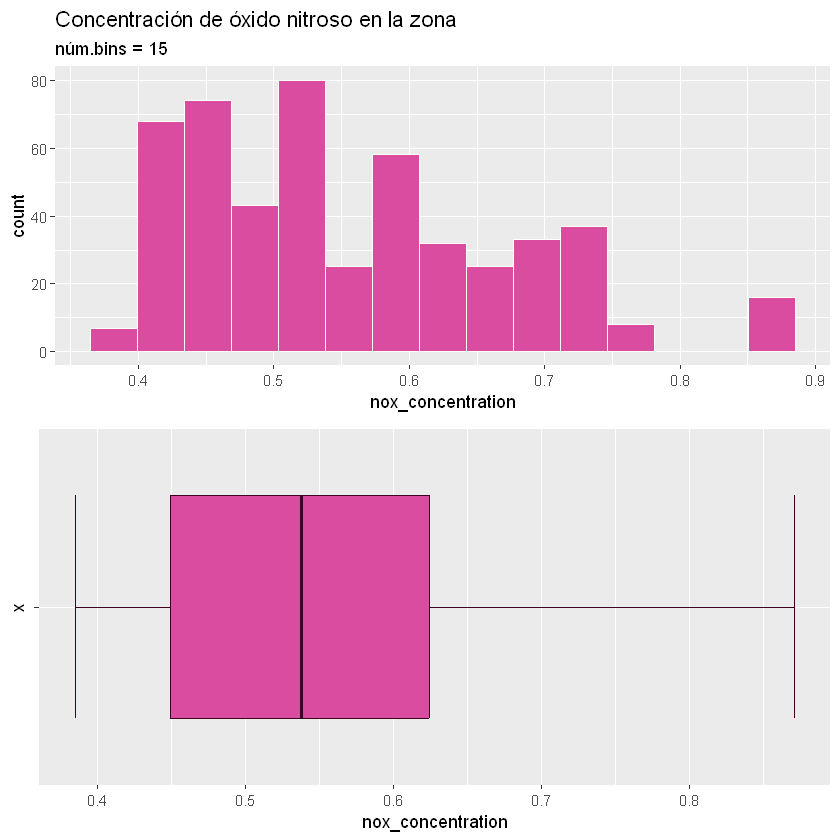

In [16]:
a= ggplot(data) + 
  aes(x = nox_concentration) +  
  geom_histogram(bins = 15 ,fill = "#d94c9f",color = "white") + 
  labs(title="Concentración de óxido nitroso en la zona"  ,subtitle = "núm.bins = 15",x = "nox_concentration")  
b= ggplot(data = data, aes(x = "", y = nox_concentration)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() # Boxplot horizontal
grid.arrange(a,b)

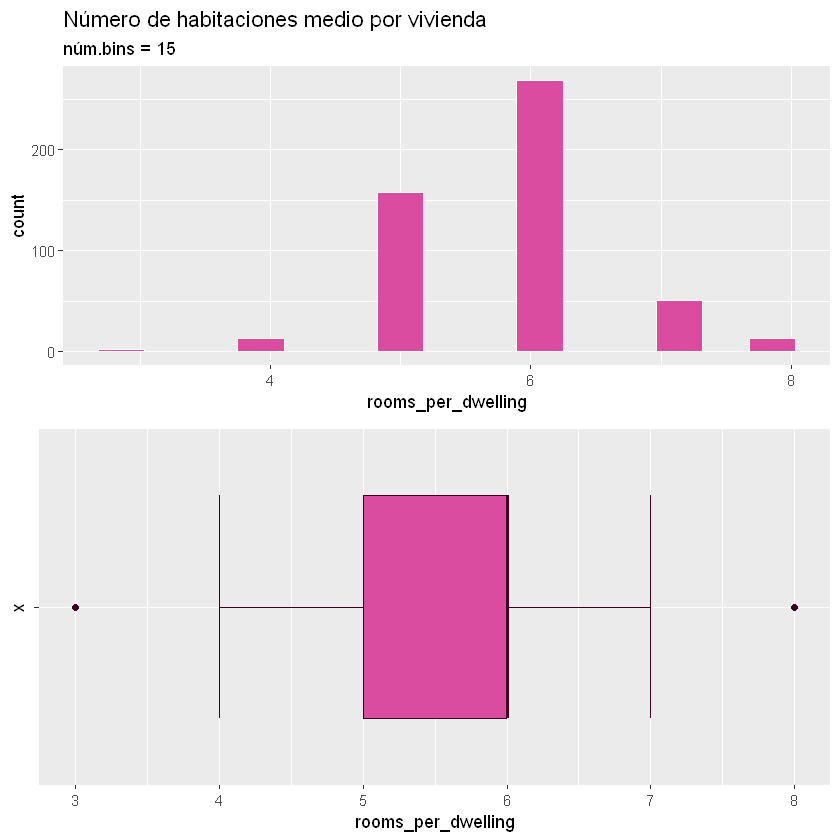

In [17]:
a= ggplot(data) + 
  aes(x = rooms_per_dwelling) +  
  geom_histogram(bins = 15 ,fill = "#d94c9f",color = "white") + 
  labs(title="Número de habitaciones medio por vivienda"  ,subtitle = "núm.bins = 15",x = "rooms_per_dwelling")  
b= ggplot(data = data, aes(x = "", y = rooms_per_dwelling)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() # Boxplot horizontal
grid.arrange(a,b)

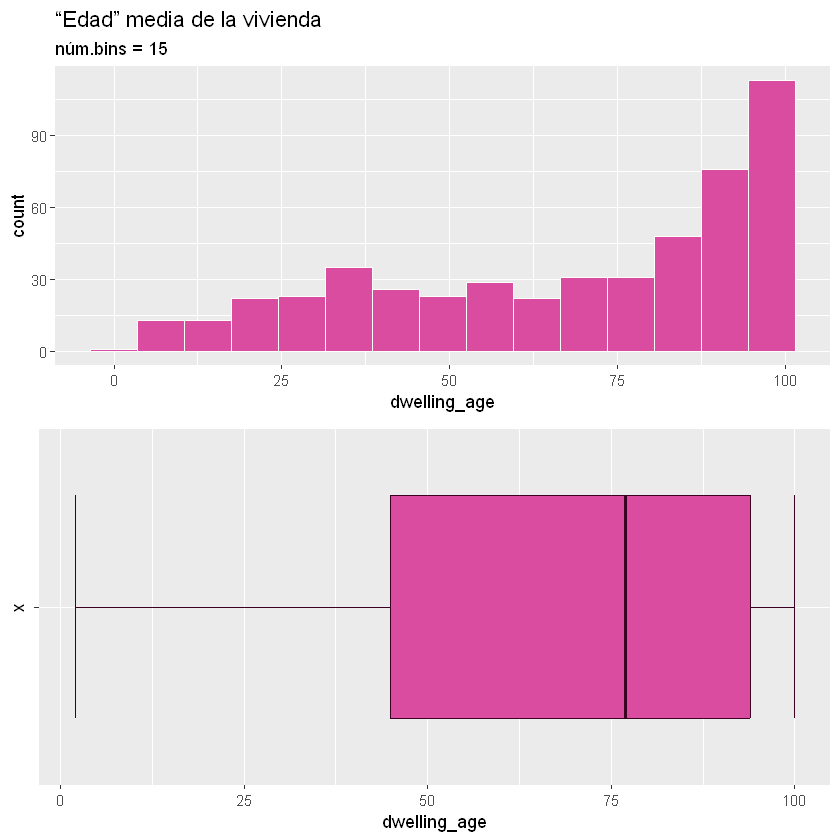

In [18]:
a= ggplot(data) + 
  aes(x = dwelling_age) +  
  geom_histogram(bins = 15 ,fill = "#d94c9f",color = "white") + 
  labs(title="“Edad” media de la vivienda"  ,subtitle = "núm.bins = 15",x = "dwelling_age")  
b= ggplot(data = data, aes(x = "", y = dwelling_age)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() # Boxplot horizontal
grid.arrange(a,b)

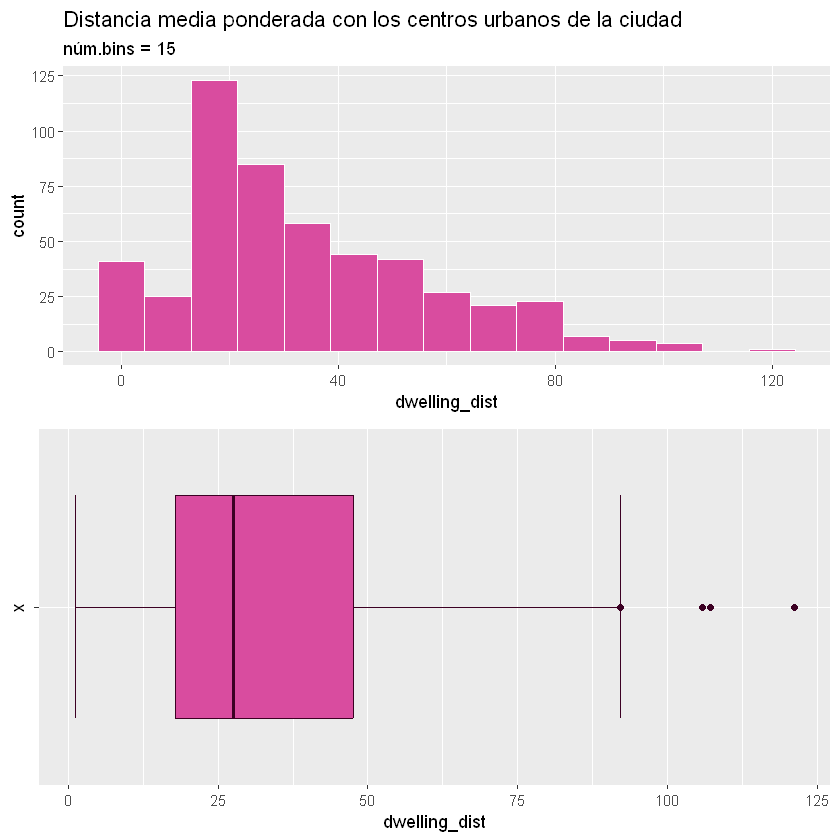

In [19]:
a= ggplot(data) + 
  aes(x = dwelling_dist) +  
  geom_histogram(bins = 15 ,fill = "#d94c9f",color = "white") + 
  labs(title= "Distancia media ponderada con los centros urbanos de la ciudad"  ,subtitle = "núm.bins = 15",x = "dwelling_dist")  
b= ggplot(data = data, aes(x = "", y = dwelling_dist)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() # Boxplot horizontal
grid.arrange(a,b)

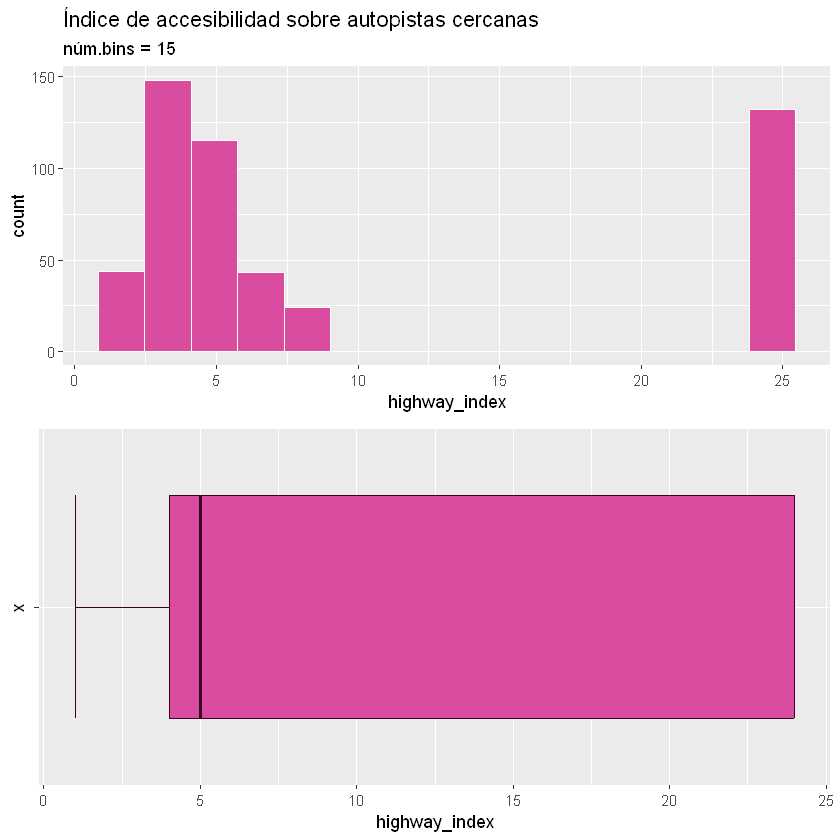

In [20]:
a= ggplot(data) + 
  aes(x = highway_index) +  
  geom_histogram(bins = 15 ,fill = "#d94c9f",color = "white") + 
  labs(title= "Índice de accesibilidad sobre autopistas cercanas"  ,subtitle = "núm.bins = 15",x = "highway_index")  
b= ggplot(data = data, aes(x = "", y = highway_index)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() # Boxplot horizontal
grid.arrange(a,b)

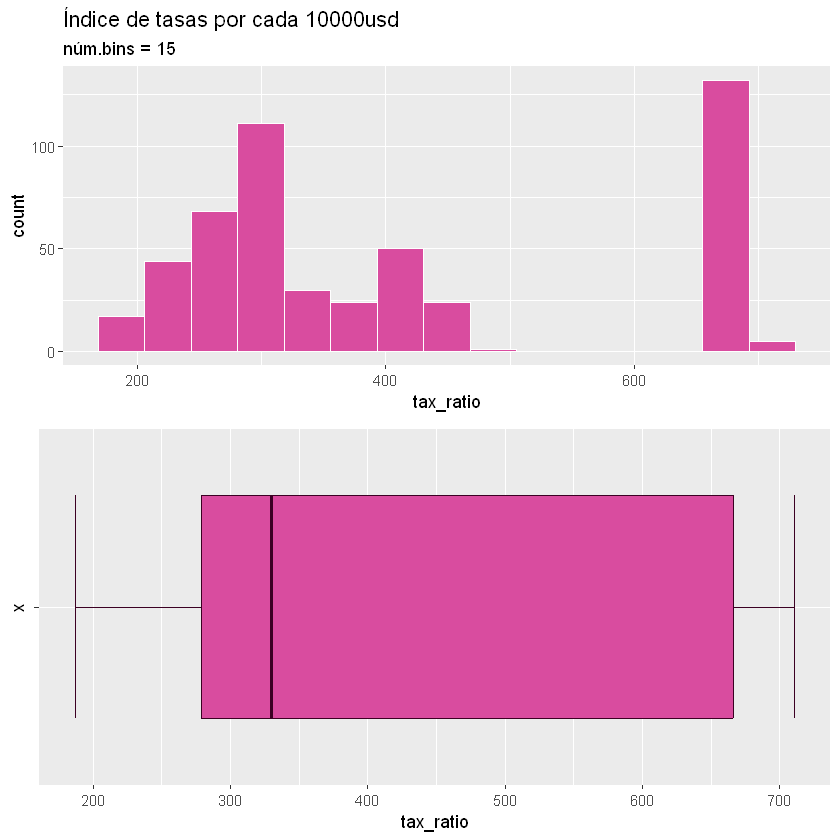

In [21]:
a= ggplot(data) + 
  aes(x = tax_ratio) +  
  geom_histogram(bins = 15 ,fill = "#d94c9f",color = "white") + 
  labs(title= "Índice de tasas por cada 10000usd"  ,subtitle = "núm.bins = 15",x = "tax_ratio")  
b= ggplot(data = data, aes(x = "", y = tax_ratio)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() # Boxplot horizontal
grid.arrange(a,b)

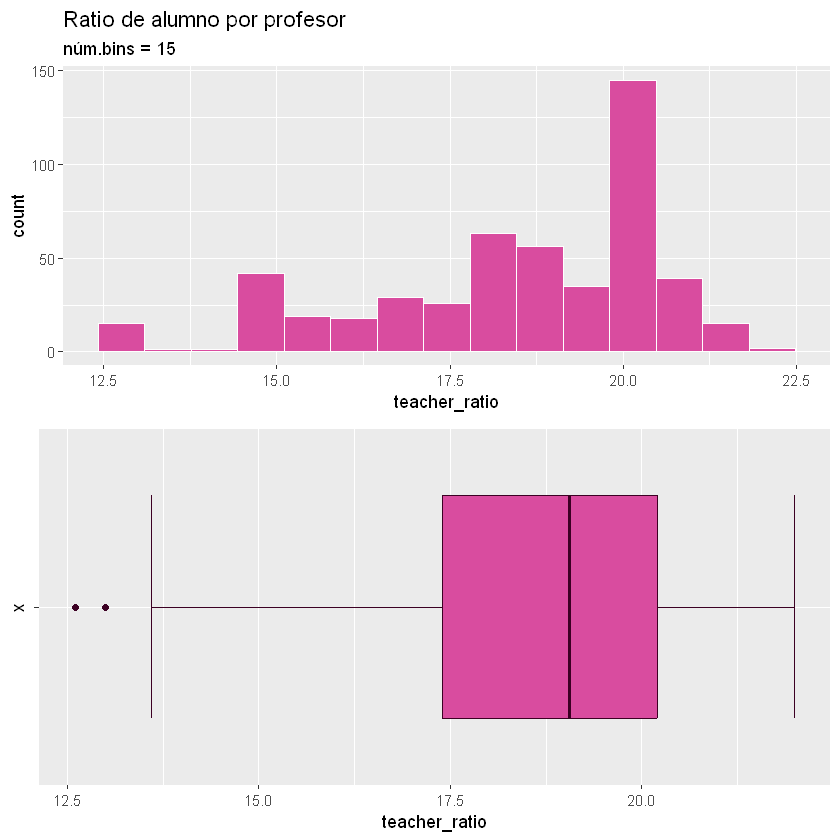

In [22]:
a= ggplot(data) + 
  aes(x = teacher_ratio) +  
  geom_histogram(bins = 15 ,fill = "#d94c9f",color = "white") + 
  labs(title= "Ratio de alumno por profesor"  ,subtitle = "núm.bins = 15",x = "teacher_ratio")  
b= ggplot(data = data, aes(x = "", y = teacher_ratio)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() # Boxplot horizontal
grid.arrange(a,b)

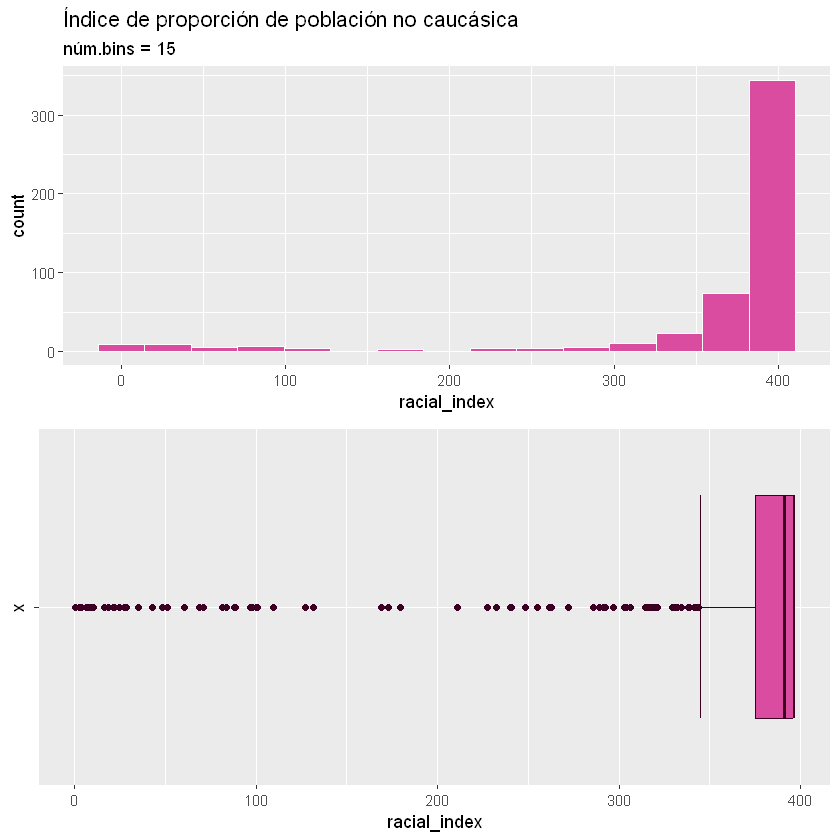

In [23]:
a= ggplot(data) + 
  aes(x = racial_index) +  
  geom_histogram(bins = 15 ,fill = "#d94c9f",color = "white") + 
  labs(title= "Índice de proporción de población no caucásica"  ,subtitle = "núm.bins = 15",x = "racial_index")  
b= ggplot(data = data, aes(x = "", y = racial_index)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() # Boxplot horizontal
grid.arrange(a,b)

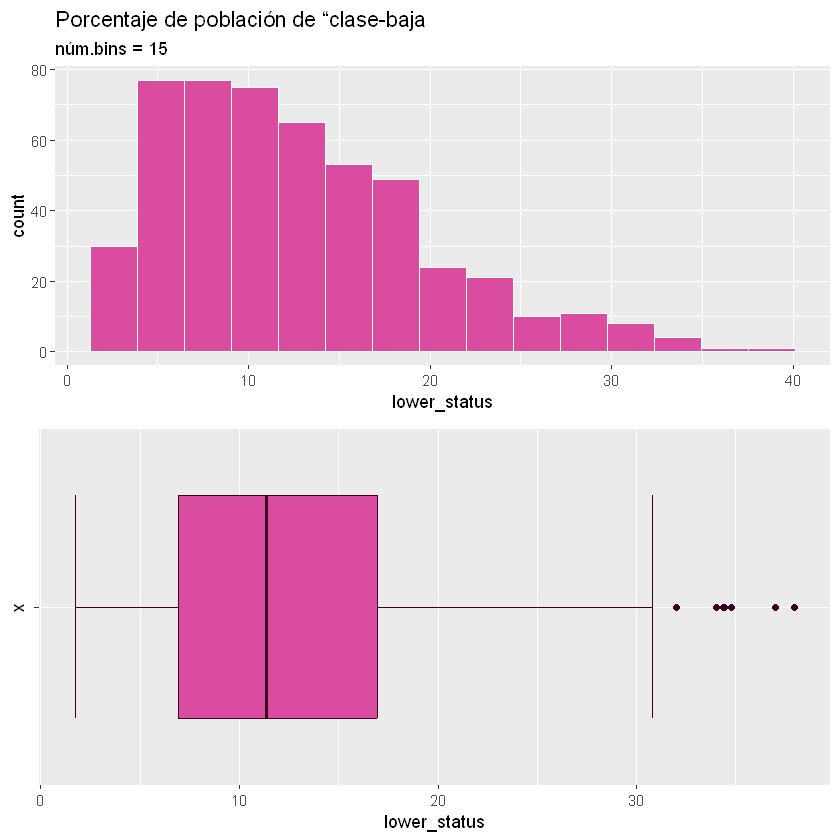

In [24]:
a= ggplot(data) + 
  aes(x = lower_status) +  
  geom_histogram(bins = 15 ,fill = "#d94c9f",color = "white") + 
  labs(title= "Porcentaje de población de “clase-baja"  ,subtitle = "núm.bins = 15",x = "lower_status")  
b= ggplot(data = data, aes(x = "", y = lower_status)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() # Boxplot horizontal
grid.arrange(a,b)

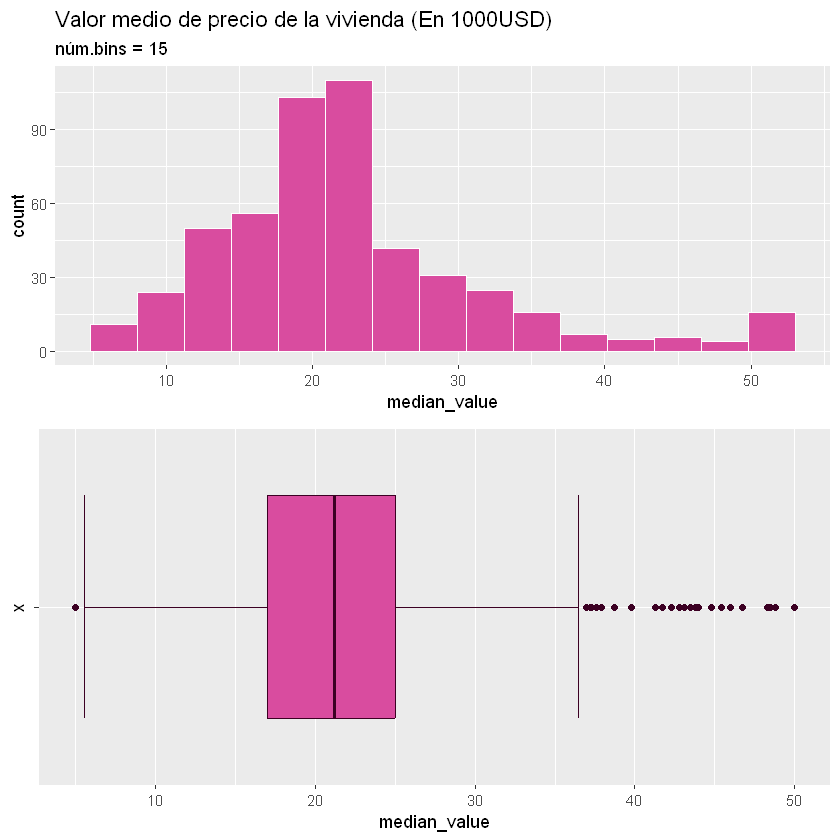

In [25]:
a= ggplot(data) + 
  aes(x = median_value) +  
  geom_histogram(bins = 15 ,fill = "#d94c9f",color = "white") + 
  labs(title= "Valor medio de precio de la vivienda (En 1000USD)"  ,subtitle = "núm.bins = 15",x = "median_value")  
b= ggplot(data = data, aes(x = "", y = median_value)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() # Boxplot horizontal
grid.arrange(a,b)

# <font color='#ED45A6'>  ESTUDIO DE CORRELACIÓN Y PCA </font>

# <font color='#ED45A6'>  ANÁLISIS CORRELACIÓN </font>

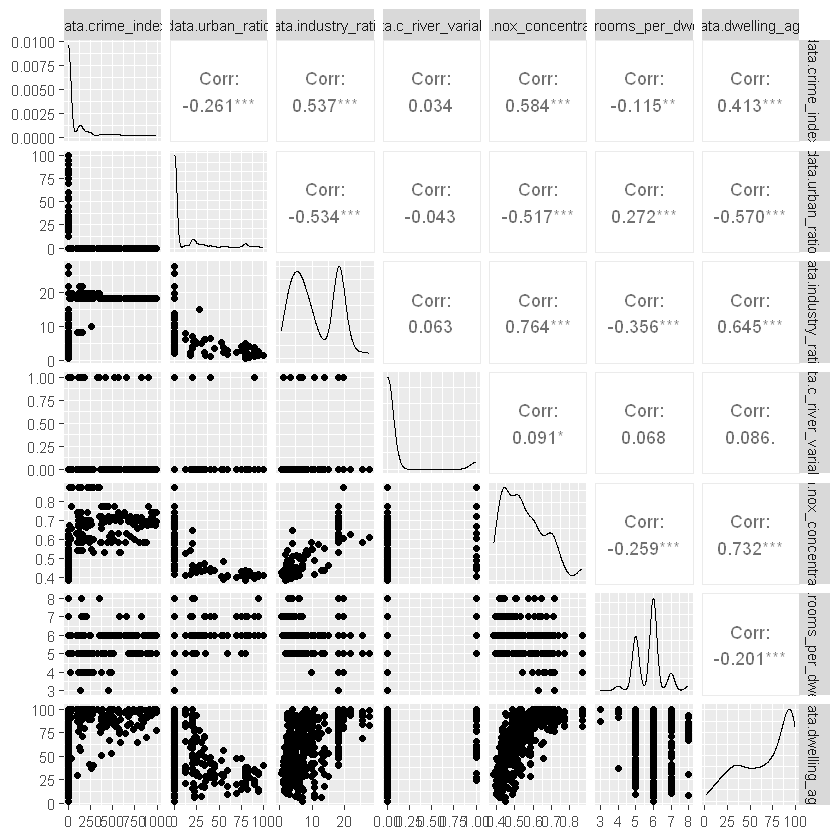

In [26]:
data_key = data.frame(data$crime_index
                            ,data$urban_ratio
                            ,data$industry_ratio#<<
                            ,data$c_river_variable#<<
                            ,data$nox_concentration#<<
                            ,data$rooms_per_dwelling
                            ,data$dwelling_age)

ggpairs(data_key)

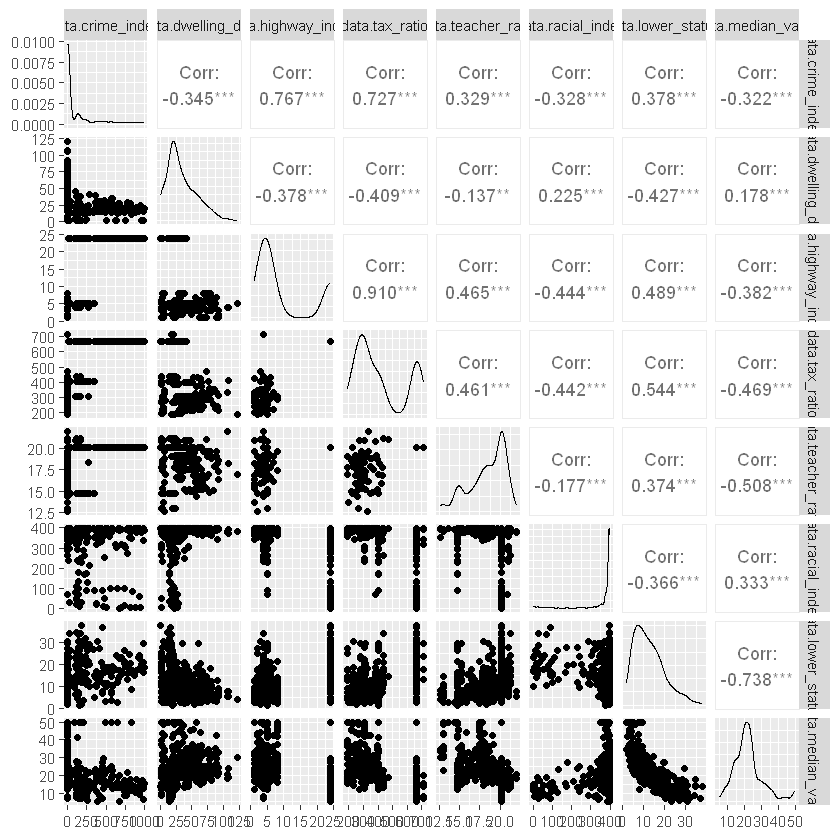

In [27]:
data_key = data.frame(data$crime_index
                            ,data$dwelling_dist
                            ,data$highway_index
                            ,data$tax_ratio
                            ,data$teacher_ratio
                            ,data$racial_index
                            ,data$lower_status
                            ,data$median_value)

ggpairs(data_key)

In [28]:
cor(data_key)

,data.crime_index,data.dwelling_dist,data.highway_index,data.tax_ratio,data.teacher_ratio,data.racial_index,data.lower_status,data.median_value
data.crime_index,1.0000000,-0.3454091,0.7673517,0.7271603,0.3293693,-0.3283539,0.3778286,-0.3223877
data.dwelling_dist,-0.3454091,1.0000000,-0.3777592,-0.4089086,-0.1373670,0.2247804,-0.4267859,0.1780964
data.highway_index,0.7673517,-0.3777592,1.0000000,0.9102282,0.4647412,-0.4444128,0.4886763,-0.3816262
data.tax_ratio,0.7271603,-0.4089086,0.9102282,1.0000000,0.4608530,-0.4418080,0.5439934,-0.4685359
data.teacher_ratio,0.3293693,-0.1373670,0.4647412,0.4608530,1.0000000,-0.1773833,0.3740443,-0.5077867
data.racial_index,-0.3283539,0.2247804,-0.4444128,-0.4418080,-0.1773833,1.0000000,-0.3660869,0.3334608
data.lower_status,0.3778286,-0.4267859,0.4886763,0.5439934,0.3740443,-0.3660869,1.0000000,-0.7376627
data.median_value,-0.3223877,0.1780964,-0.3816262,-0.4685359,-0.5077867,0.3334608,-0.7376627,1.0000000


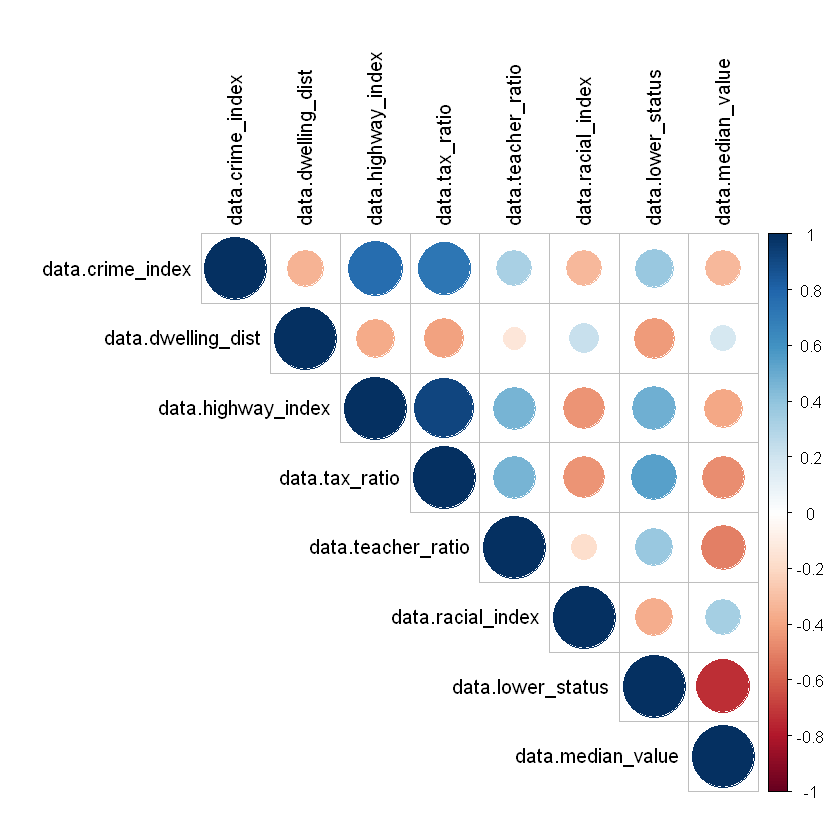

In [29]:
### Análisis de correlación
corrplot::corrplot(cor(data_key)
                   , type = "upper" #para que solo muestre de la diagonal hacia arriba (la otra mitad es igual)
                   , number.cex = .6
                   , tl.col = "black"
                   , tl.srt = 90)

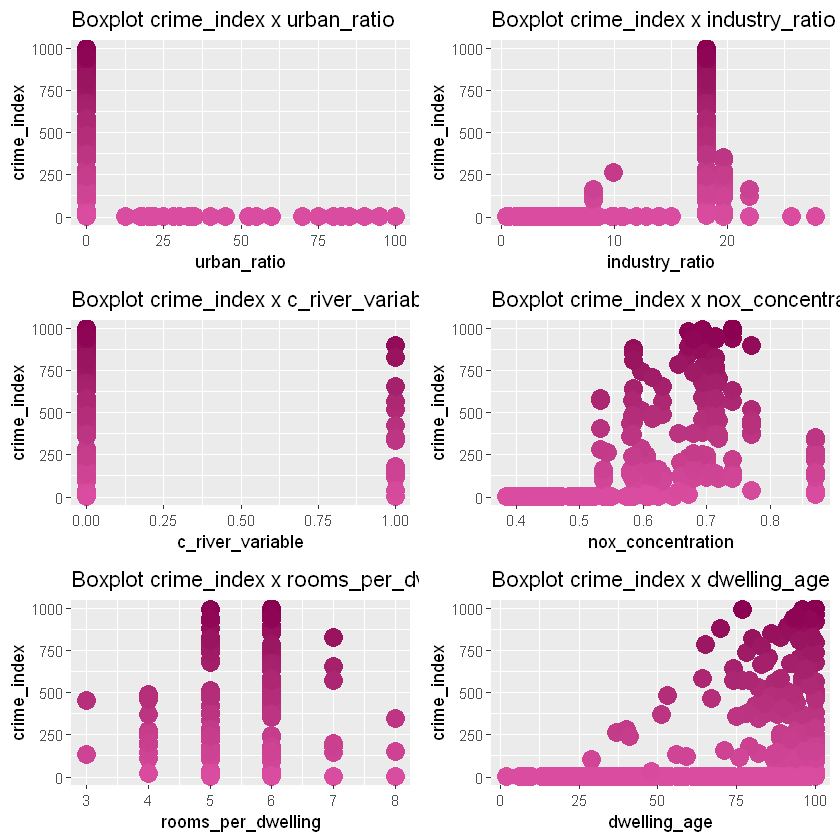

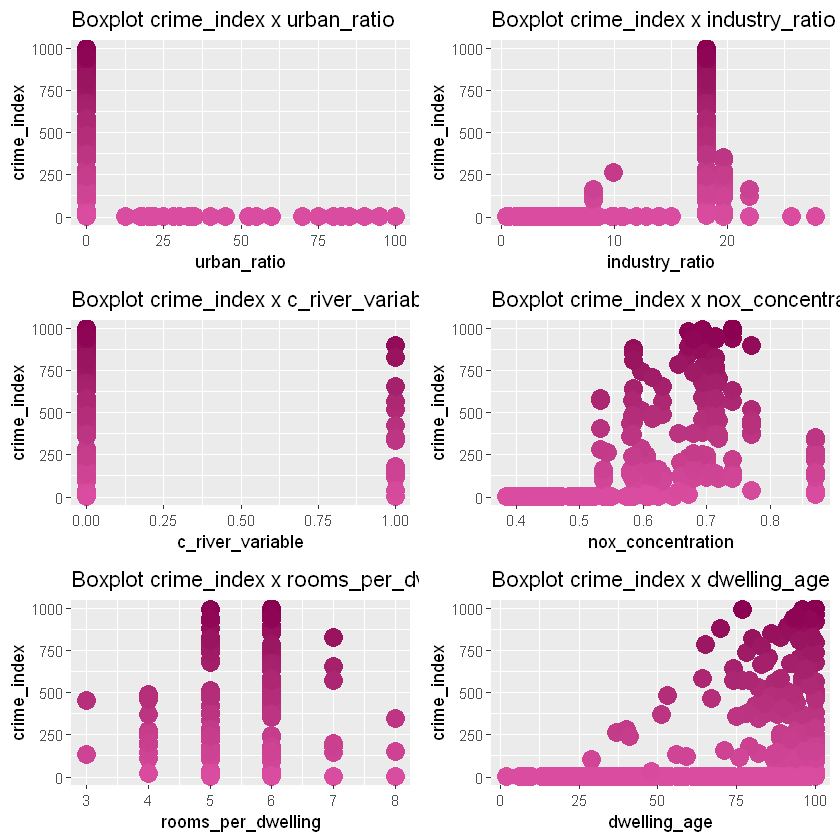

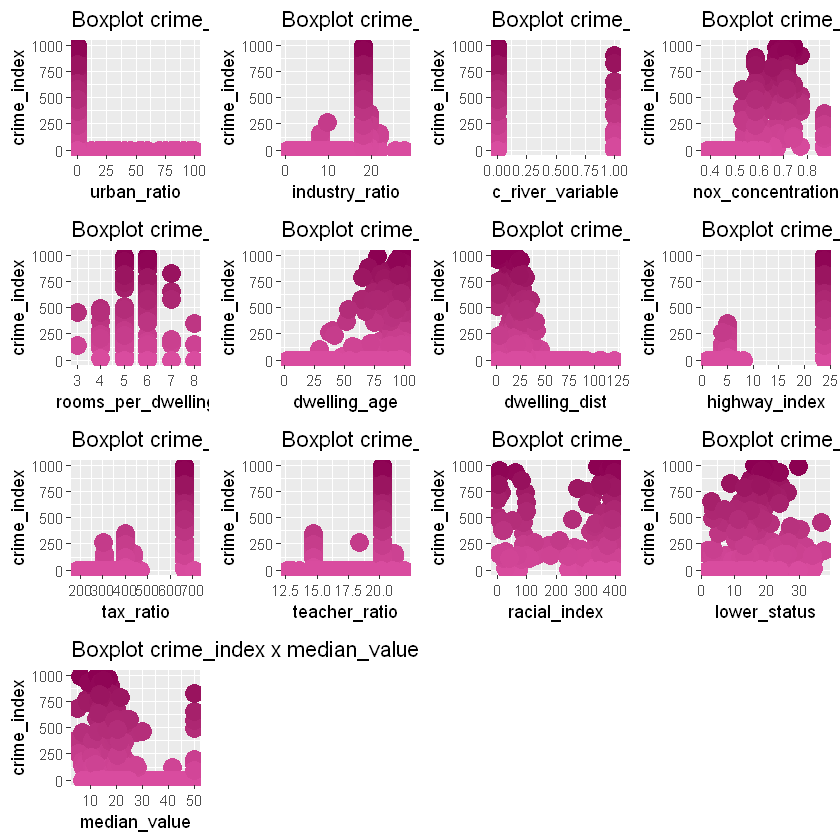

In [30]:
#urban_ratio
a = ggplot(data) +
  aes(x = urban_ratio,y = crime_index,color = crime_index) +
   geom_point(size = 5,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot crime_index x urban_ratio " )
#industry_ratio
b = ggplot(data) +
  aes(x = industry_ratio,y = crime_index,color = crime_index) +
   geom_point(size = 5,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot crime_index x industry_ratio " )
#c_river_variable
c = ggplot(data) +
  aes(x = c_river_variable ,y = crime_index,color = crime_index) +
   geom_point(size = 5 ,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot crime_index x c_river_variable " )
#nox_concentration
d = ggplot(data) +
  aes(x = nox_concentration,y = crime_index,color = crime_index) +
   geom_point(size = 5,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot crime_index x nox_concentration " )
#rooms_per_dwelling
e = ggplot(data) +
  aes(x = rooms_per_dwelling ,y = crime_index ,color = crime_index) +
   geom_point(size = 5,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot crime_index x rooms_per_dwelling " )
#dwelling_age
f = ggplot(data) +
  aes(x = dwelling_age,y = crime_index,color = crime_index) +
   geom_point(size = 5,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot crime_index x dwelling_age " )
grid.arrange(a,b,c,d,e,f)
#dwelling_dist
g = ggplot(data) +
  aes(x = dwelling_dist,y = crime_index,color = crime_index) +
   geom_point(size = 5,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot crime_index x dwelling_dist" )
grid.arrange(a,b,c,d,e,f)
#highway_index
h = ggplot(data) +
  aes(x = highway_index,y = crime_index,color = crime_index) +
   geom_point(size = 5,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot crime_index x highway_index " )
#tax_ratio
i = ggplot(data) +
  aes(x = tax_ratio,y = crime_index,color = crime_index) +
   geom_point(size = 5,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot crime_index x tax_ratio " )
#teacher_ratio
j = ggplot(data) +
  aes(x = teacher_ratio,y = crime_index,color = crime_index) +
   geom_point(size = 5,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot crime_index x teacher_ratio " )
#racial_index
k = ggplot(data) +
  aes(x = racial_index,y = crime_index,color = crime_index) +
   geom_point(size = 5,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot crime_index x racial_index " )
#lower_status
l = ggplot(data) +
  aes(x = lower_status,y = crime_index,color = crime_index) +
   geom_point(size = 5,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot crime_index x lower_status " )
#median_value
m = ggplot(data) +
  aes(x = median_value,y = crime_index,color = crime_index) +
   geom_point(size = 5,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot crime_index x median_value " )
grid.arrange(a,b,c,d,e,f,g,h,i,j,k,l,m)

# <font color='#ED45A6'>  >>PCA </font>


Aplicaremos el PCA a las variables explicativas numéricas y a la variables dicotómica "c_river_variable" la consideraremos como una variables numéricas 0/1.

In [31]:
data_cor = data.frame(data$crime_index#<<
                            ,data$urban_ratio#<<
                            ,data$industry_ratio#<<
                            ,data$c_river_variable
                            ,data$nox_concentration
                            ,data$rooms_per_dwelling#<<
                            ,data$dwelling_age#<<
                            ,data$dwelling_dist#<<
                            ,data$highway_index
                            ,data$tax_ratio
                            ,data$teacher_ratio
                            ,data$racial_index#<<
                            ,data$lower_status#<<
                            ,data$median_value)

round(cor(data_cor),2)
acp = princomp(data_cor,cor=TRUE) #función que llama al pca
summary(acp)
print('desviación estandard componente1:')
sd(predict(acp)[,1:1])
print('varianza componente1:')
var(predict(acp)[,1:1])

,data.crime_index,data.urban_ratio,data.industry_ratio,data.c_river_variable,data.nox_concentration,data.rooms_per_dwelling,data.dwelling_age,data.dwelling_dist,data.highway_index,data.tax_ratio,data.teacher_ratio,data.racial_index,data.lower_status,data.median_value
data.crime_index,1.00,-0.26,0.54,0.03,0.58,-0.12,0.41,-0.35,0.77,0.73,0.33,-0.33,0.38,-0.32
data.urban_ratio,-0.26,1.00,-0.53,-0.04,-0.52,0.27,-0.57,0.50,-0.31,-0.31,-0.39,0.18,-0.41,0.36
data.industry_ratio,0.54,-0.53,1.00,0.06,0.76,-0.36,0.64,-0.56,0.60,0.72,0.38,-0.36,0.60,-0.48
data.c_river_variable,0.03,-0.04,0.06,1.00,0.09,0.07,0.09,-0.11,-0.01,-0.04,-0.12,0.05,-0.05,0.18
data.nox_concentration,0.58,-0.52,0.76,0.09,1.00,-0.26,0.73,-0.62,0.61,0.67,0.19,-0.38,0.59,-0.43
data.rooms_per_dwelling,-0.12,0.27,-0.36,0.07,-0.26,1.00,-0.20,0.13,-0.18,-0.26,-0.34,0.14,-0.56,0.62
data.dwelling_age,0.41,-0.57,0.64,0.09,0.73,-0.20,1.00,-0.64,0.46,0.51,0.26,-0.27,0.60,-0.38
data.dwelling_dist,-0.35,0.50,-0.56,-0.11,-0.62,0.13,-0.64,1.00,-0.38,-0.41,-0.14,0.22,-0.43,0.18
data.highway_index,0.77,-0.31,0.60,-0.01,0.61,-0.18,0.46,-0.38,1.00,0.91,0.46,-0.44,0.49,-0.38
data.tax_ratio,0.73,-0.31,0.72,-0.04,0.67,-0.26,0.51,-0.41,0.91,1.00,0.46,-0.44,0.54,-0.47


Importance of components:
                         Comp.1    Comp.2     Comp.3    Comp.4    Comp.5
Standard deviation     2.529286 1.2857543 1.17535065 0.9412592 0.9336174
Proportion of Variance 0.456949 0.1180832 0.09867494 0.0632835 0.0622601
Cumulative Proportion  0.456949 0.5750322 0.67370709 0.7369906 0.7992507
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.82062790 0.65624005 0.64692512 0.59066914 0.51992539
Proportion of Variance 0.04810215 0.03076079 0.02989372 0.02492072 0.01930874
Cumulative Proportion  0.84735284 0.87811363 0.90800735 0.93292806 0.95223681
                          Comp.11    Comp.12    Comp.13     Comp.14
Standard deviation     0.50632347 0.44121844 0.39731014 0.244524364
Proportion of Variance 0.01831168 0.01390526 0.01127538 0.004270869
Cumulative Proportion  0.97054848 0.98445375 0.99572913 1.000000000

[1] "desviación estandard componente1:"


[1] 2.531789

[1] "varianza componente1:"


[1] 6.409954

In [32]:
loadings(acp)


Loadings:
                        Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8
data.crime_index         0.276  0.175  0.387  0.130         0.225         0.193
data.urban_ratio        -0.242         0.383        -0.404  0.386 -0.297 -0.454
data.industry_ratio      0.337                                     0.208  0.111
data.c_river_variable           0.382 -0.213  0.817 -0.286 -0.199 -0.109       
data.nox_concentration   0.331  0.223 -0.101 -0.112 -0.124  0.175         0.273
data.rooms_per_dwelling -0.181  0.486  0.244 -0.236  0.226 -0.212 -0.556  0.160
data.dwelling_age        0.299  0.200 -0.286 -0.165               -0.458       
data.dwelling_dist      -0.247 -0.318  0.304  0.223               -0.156  0.706
data.highway_index       0.314  0.102  0.413  0.105                            
data.tax_ratio           0.334         0.348                0.132              
data.teacher_ratio       0.211 -0.329  0.131  0.281  0.540 -0.372 -0.196 -0.304
data.racial_index       -0.19

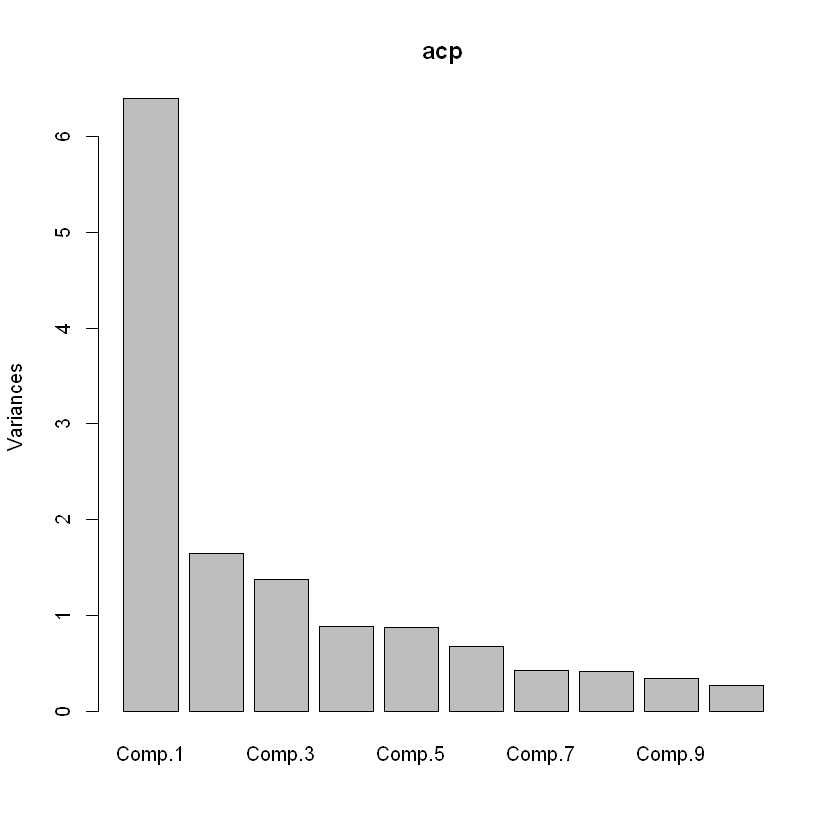

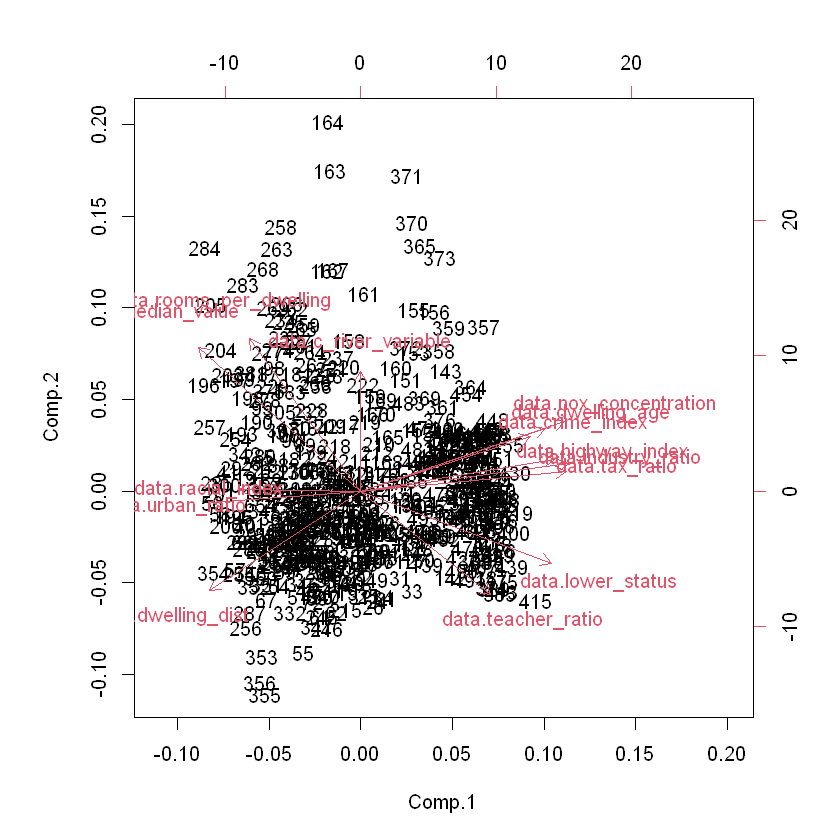

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14
-1.764014,0.8394931,-0.96018409,-1.04652512,-0.2753771,0.4409039,0.35358640,-0.6356637,0.90531028,0.32038945,0.006490510,-0.96886157,0.51541588,0.247768998
-1.470990,-0.3891712,-0.80897067,-0.32270115,0.4329315,-0.3191555,-0.38106647,0.7157432,0.27397443,-0.17245196,0.258022000,0.05810955,0.49196508,-0.106631769
-2.474327,0.9365015,-0.08546060,-0.58685399,1.0648405,-0.7813100,-0.11613061,0.6963528,-0.09510699,-0.06479772,0.082466181,0.30768423,-0.02583609,0.023596903
-2.730719,-0.2004297,0.04704972,0.05077971,0.9710772,-0.7785025,0.56677389,0.6093107,0.37047103,-0.55272875,0.280000120,-0.05820941,-0.29927041,0.052891640
-2.849859,0.5522723,0.22640352,-0.32374651,1.2528384,-0.9857315,-0.34621865,0.7492539,0.25618326,-0.43744694,0.004026696,0.25243939,-0.47814405,0.107190150
-2.357841,-0.4168870,-0.17542203,-0.01126496,0.8342323,-0.7104770,0.08046412,0.6948257,0.46545615,-0.55626205,0.316205327,-0.10904095,-0.06702119,0.002242365


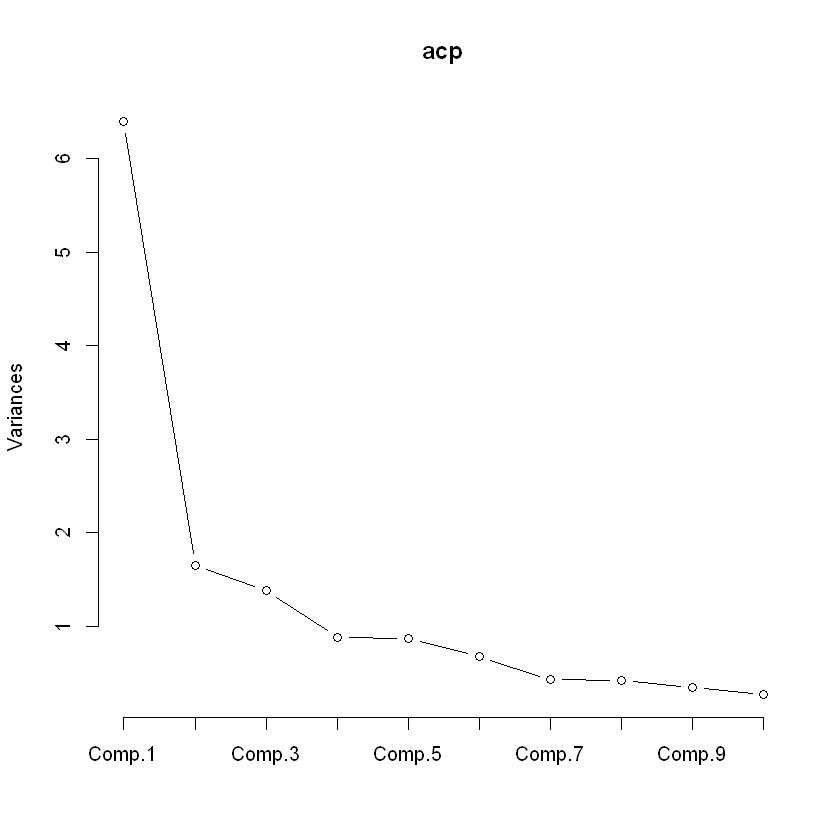

In [33]:
plot(acp)
biplot(acp)
plot(acp, type="lines")
head(acp$scores)

In [34]:
mcomponentes = cor(data_cor,predict(acp)[,1:2]) #Matriz de componentes
mcomponentes


apply(mcomponentes*mcomponentes,1,sum) #varianza de las variables explicada por la componentes 1 y 2

,Comp.1,Comp.2
data.crime_index,0.6969289170,0.224806155
data.urban_ratio,-0.6129037324,-0.046963386
data.industry_ratio,0.8520800163,0.111768682
data.c_river_variable,-0.0001939775,0.491319764
data.nox_concentration,0.8372310082,0.286507230
data.rooms_per_dwelling,-0.4579311404,0.625259931
data.dwelling_age,0.7564025818,0.256843372
data.dwelling_dist,-0.6235333803,-0.408998689
data.highway_index,0.7942391356,0.130972030
data.tax_ratio,0.8443450491,0.081458129


data.crime_index        data.urban_ratio     data.industry_ratio 
              0.5362477               0.3778565               0.7385326 
  data.c_river_variable  data.nox_concentration data.rooms_per_dwelling 
              0.2413951               0.7830422               0.6006509 
      data.dwelling_age      data.dwelling_dist      data.highway_index 
              0.6381134               0.5560738               0.6479695 
         data.tax_ratio      data.teacher_ratio       data.racial_index 
              0.7195540               0.4625306               0.2503637 
      data.lower_status       data.median_value 
              0.7006596               0.7974605

# **OBSERVACIONES**:
- En total tenemos 14 componentes (= número de variables)

- En la tabla "Importance of components" observamos que el componente 1 retiene la mayor cantidad posible de variabilidad en los datos, agrupa un 45.6% de variación.

- En la tabla "Loadings" las variables que destacan son : data.industry_ratio, data.nox_concentration, data.highway_index, data.tax_ratio y data.lower_status. Estas 5 variables concentran la mayor parte de la variación.

- En el gráfico PCA observamos claramente las Variaciones de las puntuaciones en las componentes principales.

- Por último en la tabla de los componentes 1 y 2 observamos que y vemos que un 69% de la varianza de  "crime_index" viene explicada por la componente 1.





# <font color='#ED45A6'>  CONSTRUCCIÓN MODELO </font>

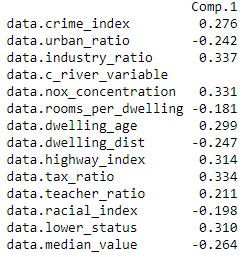

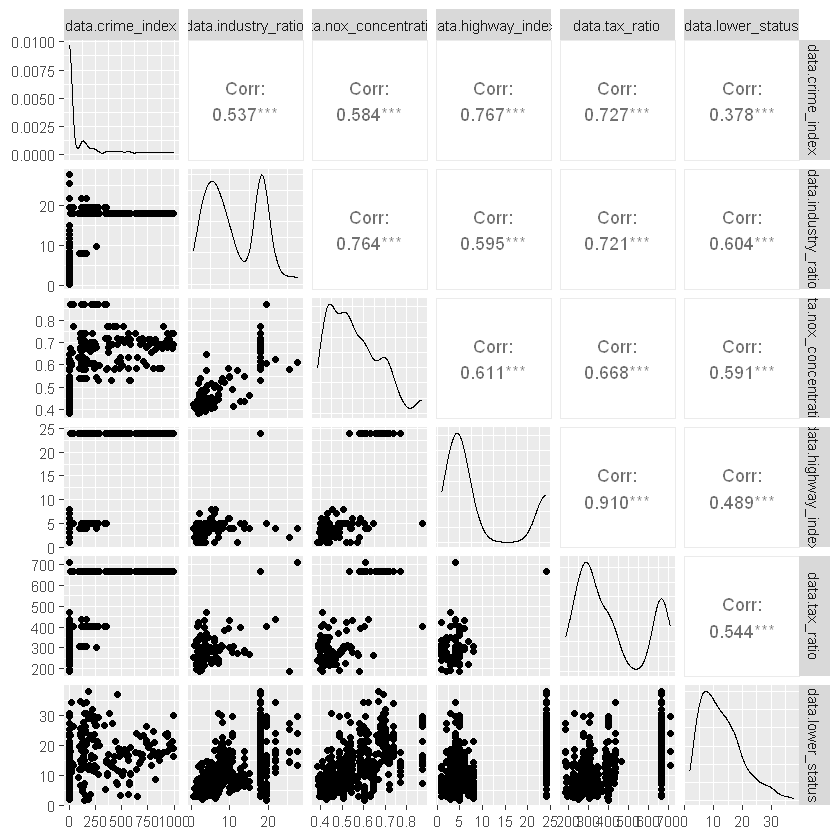

In [35]:
# Variables seleccionadas por PCA:
data_macro_preml = data.frame(data$crime_index
                              ,data$industry_ratio
                              ,data$nox_concentration                              
                              ,data$highway_index
                              ,data$tax_ratio                         
                              ,data$lower_status)
ggpairs(data_macro_preml)

In [66]:
data_ml= data
set.seed(123)
inTrain = createDataPartition(y = data$crime_index
                              ,p = 0.6
                              , list = FALSE
                              , times = 1) #Creamos una partición aleatoria de los datos para usar el 60% como train y el 40% como test

data_train  = data_ml[inTrain, ] #separamos los datos según esta partición
data_test = data_ml[-inTrain, ]

# <font color='#ED45A6'>  MODELO LINEAL MULTIPLE </font>

Teniendo en cuenta la más alta correlación de las Variables seleccionadas por PCA, elegimos 'highway_index'y 'nox_concentration' para entrenar el modelo.

In [67]:
modelo_lm = lm(crime_index ~ highway_index+tax_ratio, data = data_train) # Entrenamos el modelo
summary(modelo_lm)


Call:
lm(formula = crime_index ~ highway_index + tax_ratio, data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-440.30  -49.38  -10.79   36.66  546.12 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -143.0100    34.6082  -4.132 4.65e-05 ***
highway_index   17.3645     2.5454   6.822 4.88e-11 ***
tax_ratio        0.2655     0.1325   2.003   0.0461 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 155.8 on 303 degrees of freedom
Multiple R-squared:  0.6039,	Adjusted R-squared:  0.6013 
F-statistic:   231 on 2 and 303 DF,  p-value: < 2.2e-16


### <font color='#ED45A6'>  COMPROBAMOS EL RESTO DE SUPUESTOS: </font>


### <font color='#ED45A6'>  ***Normalidad:*** </font>


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  modelo_lm$residuals
D = 0.19552, p-value < 2.2e-16


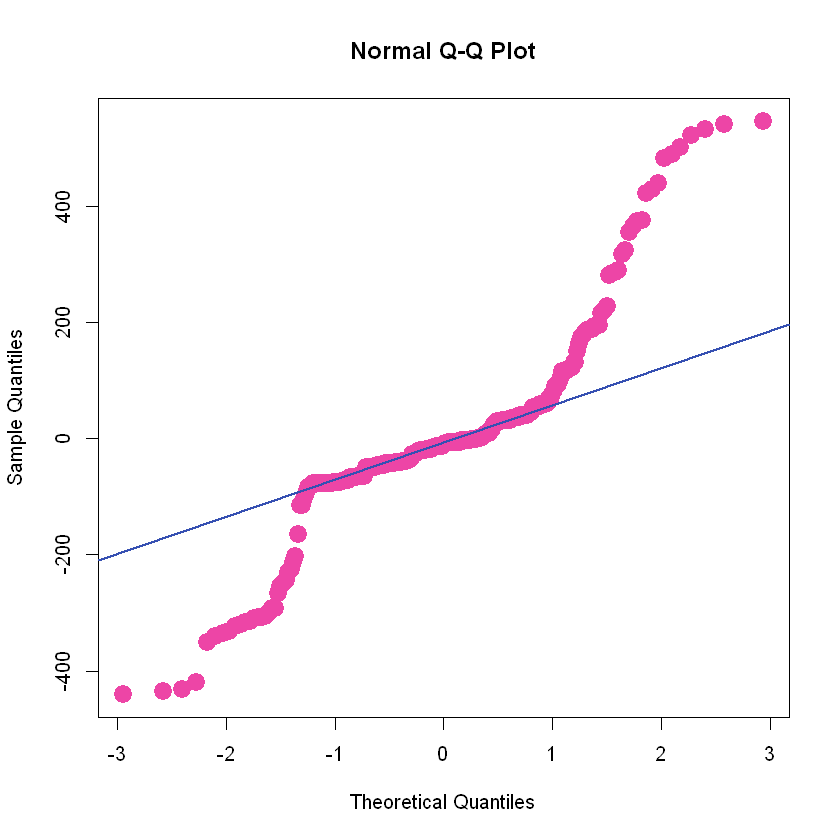

In [68]:
# Visualization
qqnorm(modelo_lm$residuals,pch =19,col ="#ED45A6", cex=2)
qqline(modelo_lm$residuals , col = "#3650b2", lwd = 2 )  

# Statistical Test
lillie.test(modelo_lm$residuals)

# <font color='#ED45A6'>  ***Homocedasticidad:*** </font>

- Visualización: Residuos vs valores ajustados.

- Prueba estadística: la prueba de Breusch Pagan


	studentized Breusch-Pagan test

data:  modelo_lm
BP = 122.67, df = 2, p-value < 2.2e-16


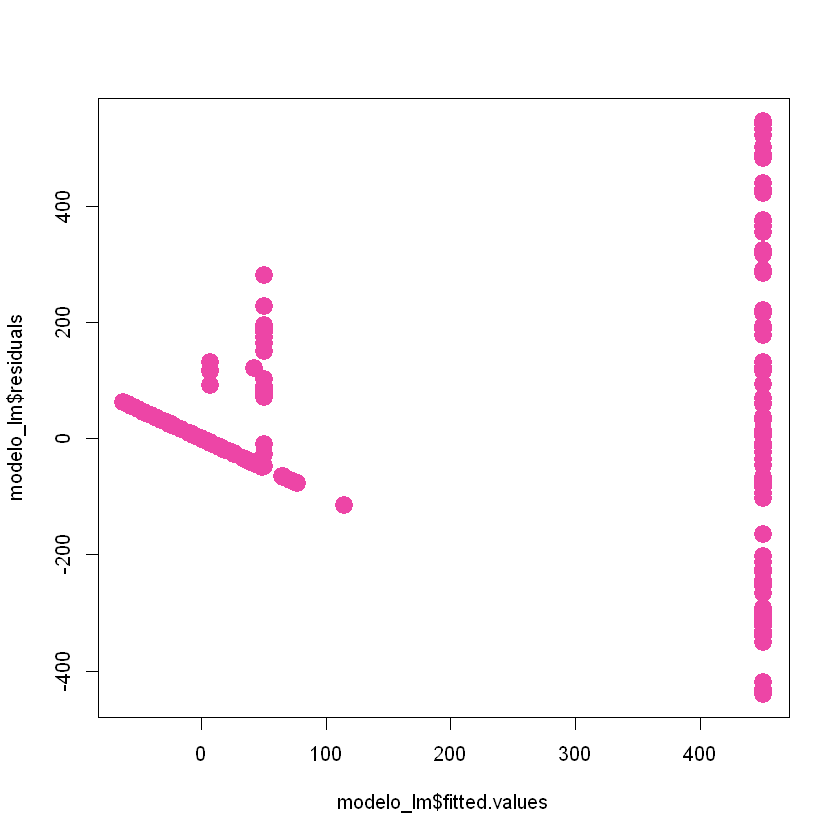

In [69]:
# Visualization
plot(modelo_lm$fitted.values , modelo_lm$residuals , pch =19,col ="#ED45A6", cex=2 )

# Test Breusch-Pagan
bptest(modelo_lm)

Como el p-valor es inferior al nivel de significanza de 0.05, podemos rechazar la hipótesis nula de que los residuos del modelo son homocedásticos.

### <font color='#ED45A6'>  ***Autocorrelación:*** </font>

- Visualización: Residual vs Orden de toma de observaciones.
- Prueba estadística: la prueba de Durbin-Watson.

In [70]:
# Prueba de Durbin-Watson
dw_test <- durbinWatsonTest(modelo_lm)
dw_test

 lag Autocorrelation D-W Statistic p-value
   1      0.07341911      1.852638    0.17
 Alternative hypothesis: rho != 0

La autocorrelación de los residuos no es cero, son independientes. 

# <font color='#ED45A6'>  ***Media de errores:*** </font>

In [71]:
mean(modelo_lm$residuals)

[1] -1.055279e-15

### <font color='#ED45A6'>  ***Detección de Outliers:*** </font>

Una tarea más es detectar si hay algún Outlier en el conjunto de datos dado. Porque si hay un Outlier, el resultado obtenido anteriormente no será confiable. Por tanto, existe la necesidad de detectar un Outlier.

Visualización y Prueba estadística: la **Distancia de Cook** (estima la influencia de un punto en la regresión)

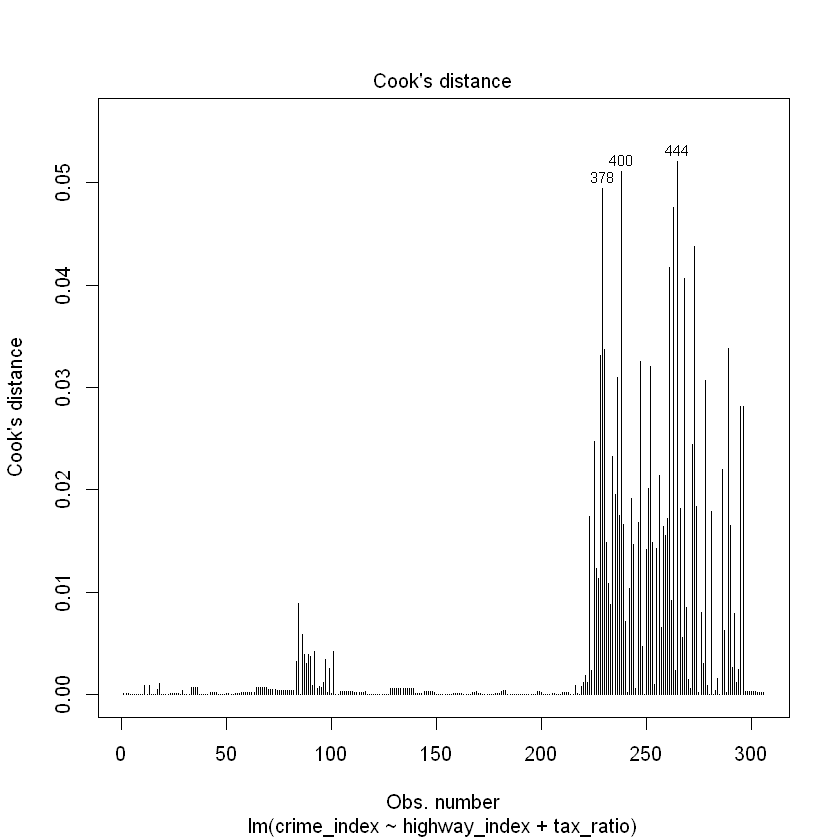

In [72]:
# Visualization (Cook's distance plot)
plot(modelo_lm , 4)

## <font color='#ED45A6'>  PREDICCIONES </font>

A partir del conjunto de datos TEST verificamos el rendimiento ya que es un conjunto de datos "ciego", es decir, determina qué tan bien funcionará este modelo en datos no vistos.

Esto se hará nuevamente mediante dos métodos:

- Visualización: el gráfico de Indice de criminalidad previsto frente a Indice de criminalidad real para el conjunto de datos TEST.
- Medida estadística: R2, RMSE, MAE.

R2,RMSE,MAE
<dbl>,<dbl>,<dbl>
0.5782802,159.7598,101.301


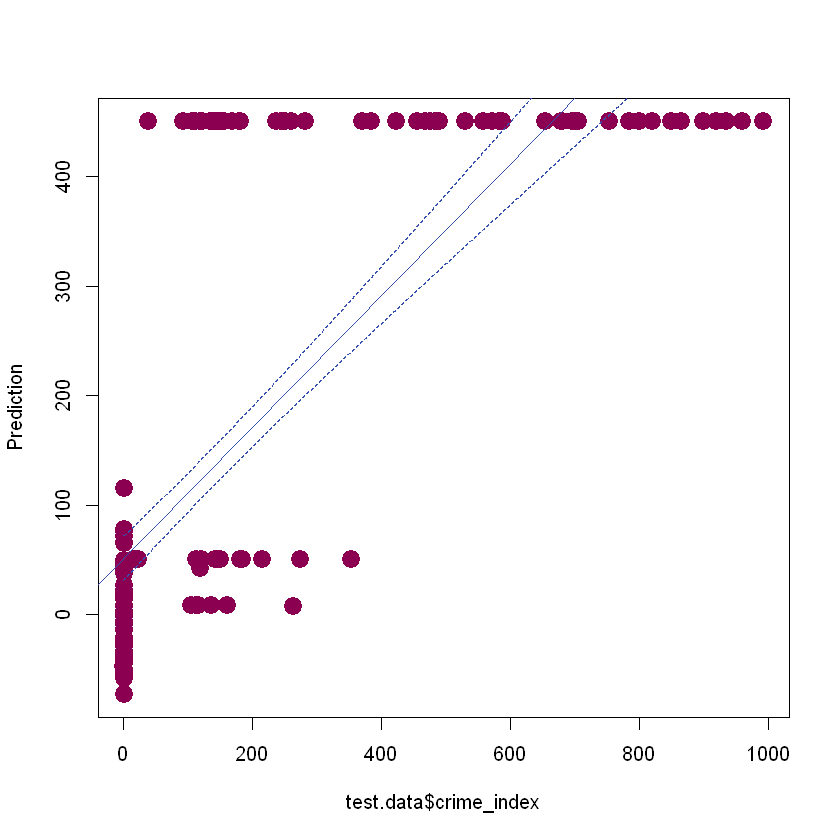

In [73]:
# Making prediction
prediction = predict(modelo_lm, data_test)

### Visualization
plot(data_test$crime_index, prediction, xlab="test.data$crime_index", ylab="Prediction", pch =19,col ="#8c0052", cex=2)

#add fitted regression line
lm.out = lm(prediction ~ crime_index, data = data_test)
newx = seq(min(data_test$crime_index),max(data_test$crime_index),by = 0.05)
conf_interval = predict(lm.out, newdata=data.frame(crime_index=newx), interval="confidence", level = 0.95)
abline(lm.out, col = "#3650b2")

#add conf_interval lines
lines(newx, conf_interval[,2], col="#3650b2", lty=2)
lines(newx, conf_interval[,3], col="#3650b2", lty=2)

# Statistical Measure
data.frame( R2 = R2(prediction, data_test$crime_index),
            RMSE = RMSE(prediction, data_test$crime_index),
            MAE = MAE(prediction, data_test$crime_index))

# <font color='#ED45A6'> ANOVA One-Way industry_ratio</font>

2. Análisis de correlación y de componentes principales (3p): Se valorará principalmente la interpretación de dichas análisis, así como la “limpieza” de la presentación

In [44]:
dim(data)

[1] 506  14

El dataset para este caso práctico consta de 506 observaciones con un total de 14 variables, siendo 1 de ellas categórica

Como el análisis con los histogramas y los boxplots lo hicimos al comienzo del ejercicio pasamos a hacer el ANOVA desde el análisis de los qqplot.

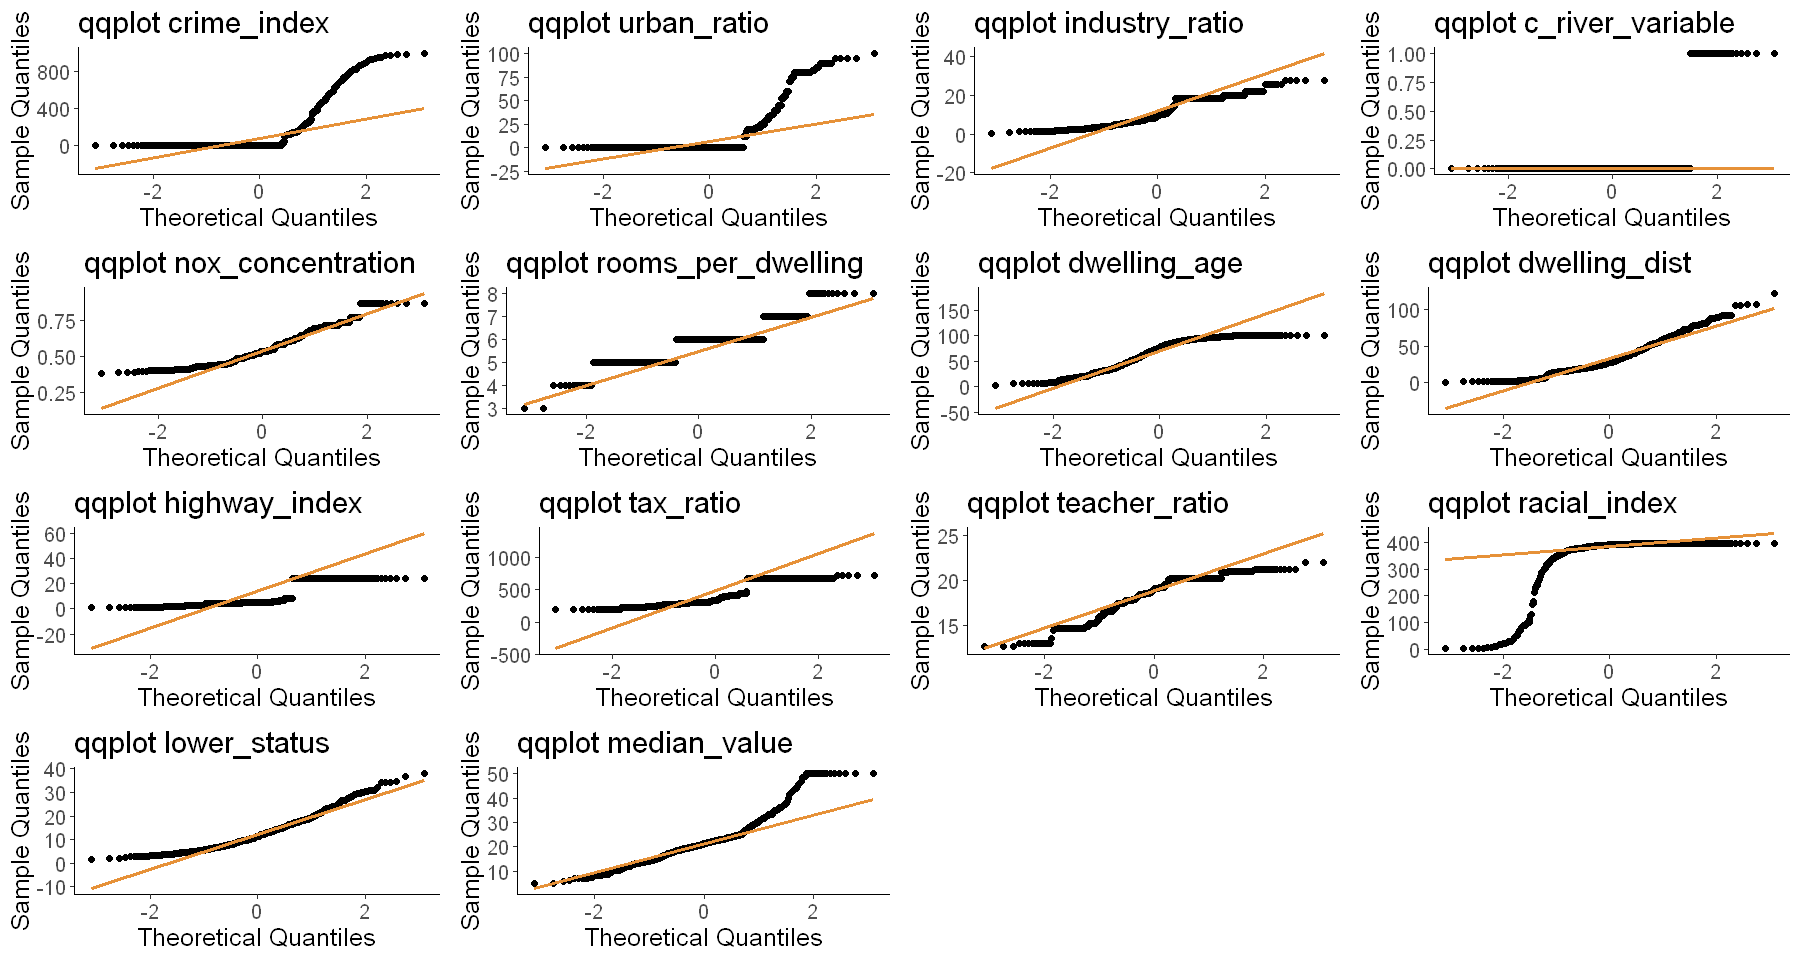

In [45]:
options(
  repr.plot.width = 15,  
  repr.plot.height = 8  
)
qq_plots = list()
var_data = colnames(data)

for (i in seq_along(var_data)) {
  variable = var_data[i]
  qq_plot = ggplot(data[!is.na(data[[variable]]), ],aes(sample = !!sym(variable))) +
    stat_qq() +
    stat_qq_line(color ='#e69138', lwd = 1) +
    labs(title = paste('qqplot', variable),
         x = 'Theoretical Quantiles',
         y = 'Sample Quantiles') +
    theme_classic() +
    theme(text = element_text(size = 15))
  qq_plots[[i]] = qq_plot
}

grid.arrange(grobs = qq_plots, ncol = 4, widths = rep(2, 4))

Algunas variables siguen aparentemente una distribución normal como nox_concentration, dwelling_dist, lower_status y median_value pero elegimos las variables/grupos 'industry_ratio'porque en la componente 1 representa un alto porcentaje de la varianza y tiene también una correlación alta con respecto a la variable objetivo 'crime_index'.     

Planteamos las hipótesis

- $H_{0}$: No existen diferencias significativas entre las medias de los grupos
- $H_{1}$: Existen diferencian significativas entre las medias de los grupos

A partir de este punto vamos a centrarnos en si existe diferencia entre la variable 'crime_index' (variable_dependiente) y c_river_variable(variable categórica independiente)

In [46]:
list_crime_index = data$crime_index
list_crime_index

[1]   0.00632   0.02731   0.02729   0.03237   0.06905   0.02985   0.08829
  [8]   0.14455   0.21124   0.17004   0.22489   0.11747   0.09378   0.62976
 [15]   0.63796   0.62739 105.39300   0.78420   0.80271   0.72580 125.17900
 [22]   0.85204 123.24700   0.98843   0.75026   0.84054   0.67191   0.95577
 [29]   0.77299 100.24500 113.08100 135.47200 138.79900 115.17200 161.28200
 [36]   0.06417   0.09744   0.08014   0.17505   0.02763   0.03359   0.12744
 [43]   0.14150   0.15936   0.12269   0.17142   0.18836   0.22927   0.25387
 [50]   0.21977   0.08873   0.04337   0.05360   0.04981   0.01360   0.01311
 [57]   0.02055   0.01432   0.15445   0.10328   0.14932   0.17171   0.11027
 [64]   0.12650   0.01951   0.03584   0.04379   0.05789   0.13554   0.12816
 [71]   0.08826   0.15876   0.09164   0.19539   0.07896   0.09512   0.10153
 [78]   0.08707   0.05646   0.08387   0.04113   0.04462   0.03659   0.03551
 [85]   0.05059   0.05735   0.05188   0.07151   0.05660   0.05302   0.04684
 [92]   0.03932   0.04203   0.02875   0.04294   0.12204   0.11504   0.12083
 [99]   0.08187   0.06860   0.14866   0.11432   0.22876   0.21161   0.13960
[106]   0.13262   0.17120   0.13117   0.12802   0.26363   0.10793   0.10084
[113]   0.12329   0.22212   0.14231   0.17134   0.13158   0.15098   0.13058
[120]   0.14476   0.06899   0.07165   0.09299   0.15038   0.09849   0.16902
[127]   0.38735   0.25915   0.32543   0.88125   0.34006 119.29400   0.59005
[134]   0.32982   0.97617   0.55778   0.32264   0.35233   0.24980   0.54452
[141]   0.29090 162.86400 332.10500  40.97400 277.97400 237.93400 215.50500
[148] 236.86200 233.09900 273.39700  16.56600 149.63200 112.65800 214.91800
[155] 141.38500 353.50100 244.66800 122.35800 134.28400 142.50200 127.34600
[162] 146.33600 183.37700 151.90200 224.23600   2.92400 201.01900 180.02800
[169]  23.00400 244.95300 120.74200  23.13900   0.13914   0.09178   0.08447
[176]   0.06664   0.07022   0.05425   0.06642   0.05780   0.06588   0.06888
[183]   0.09103   0.10008   0.08308   0.06047   0.05602   0.07875   0.12579
[190]   0.08370   0.09068   0.06911   0.08664   0.02187   0.01439   0.01381
[197]   0.04011   0.04666   0.03768   0.03150   0.01778   0.03445   0.02177
[204]   0.03510   0.02009   0.13642   0.22969   0.25199   0.13587   0.43571
[211]   0.17446   0.37578   0.21719   0.14052   0.28955   0.19802   0.04560
[218]   0.07013   0.11069   0.11425   0.35809   0.40771   0.62356   0.61470
[225]   0.31533   0.52693   0.38214   0.41238   0.29819   0.44178   0.53700
[232]   0.46296   0.57529   0.33147   0.44791   0.33045   0.52058   0.51183
[239]   0.08244   0.09252   0.11329   0.10612   0.10290   0.12757   0.20608
[246]   0.19133   0.33983   0.19657   0.16439   0.19073   0.14030   0.21409
[253]   0.08221   0.36894   0.04819   0.03548   0.01538   0.61154   0.66351
[260]   0.65665   0.54011   0.53412   0.52014   0.82526   0.55007   0.76162
[267]   0.78570   0.57834   0.54050   0.09065   0.29916   0.16211   0.11460
[274]   0.22188   0.05644   0.09604   0.10469   0.06127   0.07978   0.21038
[281]   0.03578   0.03705   0.06129   0.01501   0.00906   0.01096   0.01965
[288]   0.03871   0.04590   0.04297   0.03502   0.07886   0.03615   0.08265
[295]   0.08199   0.12932   0.05372   0.14103   0.06466   0.05561   0.04417
[302]   0.03537   0.09266   0.10000   0.05515   0.05479   0.07503   0.04932
[309]   0.49298   0.34940 263.54800   0.79041   0.26169   0.26938   0.36920
[316]   0.25356   0.31827   0.24522   0.40202   0.47547   0.16760   0.18159
[323]   0.35114   0.28392   0.34109   0.19186   0.30347   0.24103   0.06617
[330]   0.06724   0.04544   0.05023   0.03466   0.05083   0.03738   0.03961
[337]   0.03427   0.03041   0.03306   0.05497   0.06151   0.01301   0.02498
[344]   0.02543   0.03049   0.03113   0.06162   0.01870   0.01501   0.02899
[351]   0.06211   0.07950   0.07244   0.01709   0.04301   0.10659 898.29600
[358]  38.49700 520.17700 426.13100 454.19200 383.68400 367.82200 422.23900
[365] 347.42800 455.58700 369.69500 135.22200 489.

In [47]:
list_c_river_variable = data$c_river_variable
list_c_river_variable

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
[149] 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1
[223] 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1
[371] 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [51]:
dataAnova <- data.frame(index_crime = list_crime_index, c_river_variable = list_c_river_variable)
dataAnova

index_crime,c_river_variable
<dbl>,<int>
0.00632,0
0.02731,0
0.02729,0
0.03237,0
0.06905,0
0.02985,0
0.08829,0
0.14455,0
0.21124,0


## <font color='#ED45A6'> One-Way ANOVA </font>

Vamos a centrarnos en si existe diferencia entre los grupos definidos por nuestro factor 'index_crime' respecto de la variable categórica numérica 'c_river_variable'

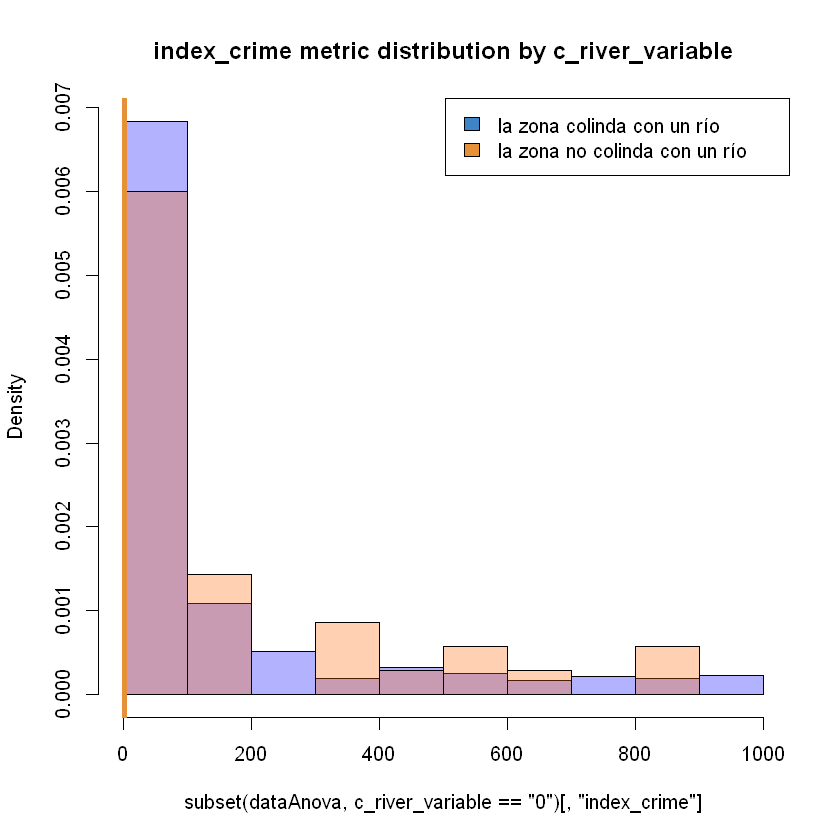

In [62]:
options(
  repr.plot.width = 7,  
  repr.plot.height = 7  
)
# Probabilistic hystogram with the 'FL' distribution by species 
hist(subset(dataAnova,c_river_variable=='0')[,'index_crime'],
    col = rgb(0,0,1,0.3),
    main = 'index_crime metric distribution by c_river_variable',
    freq = F)
hist(subset(dataAnova,c_river_variable=='1')[,'index_crime'],
    col = rgb(1,0.4,0,0.3),
    add = T,
    freq = F)

# Mediana 'FL' x species
abline(v = median(subset(dataAnova, c_river_variable=='0')[,'index_crime']), col = '#3d85c6', lwd = 4)
abline(v = median(subset(dataAnova, c_river_variable=='1')[,'index_crime']), col = '#e69138', lwd = 4)
legend(x = "topright", legend = c('la zona colinda con un río ', 'la zona no colinda con un río '), fill = c('#3d85c6', '#e69138'))

In [57]:
anova_result <- aov(index_crime ~ c_river_variable, data = dataAnova)
anova_result

Call:
   aov(formula = index_crime ~ c_river_variable, data = dataAnova)

Terms:
                c_river_variable Residuals
Sum of Squares             35257  30623729
Deg. of Freedom                1       504

Residual standard error: 246.4982
Estimated effects may be unbalanced

In [58]:
summary(anova_result)

                  Df   Sum Sq Mean Sq F value Pr(>F)
c_river_variable   1    35257   35257    0.58  0.447
Residuals        504 30623729   60761               

In [60]:
p_value <- summary(anova_result)[[1]]$`Pr(>F)`[1]
p_value

[1] 0.4465719

Observamos un valor P_valor alto por lo tanto no se rechaza la hipótesis nula.
Esto implica que no hay suficiente evidencia estadística para afirmar que hay diferencias significativas entre las medias de los grupos'la criminalidad de zona colinda con un río 'y 'la criminalidad de la zona que no colinda con un río '

4. Desarrollo y justificación de las variables (1p): En base a las conclusiones sacadas en los puntos 1, 2, y 3 ¿Qué variables debemos utilizar en nuestro modelo de regresión lineal?

Con base a las conclusiones sacadas en los puntos 1, 2, y 3 las variables debemos utilizar en nuestro modelo de regresión lineal son 'highway_index'y 'tax_ratio' por las siguientes razones:

- Observamos en el análisis descriptivo que apesar de no tener una distribución normal tampoco eran histogramas tan extraños y ademas en los boxplot observamos que no tenian outliers.

- Tienen una correlación alta con la variable objetivo - highway_index=0.767 y tax_ratio = 0.0.727

- Analizando la componente 1 vemos que 'highway_index' y tax_ratio tienen los valores altos en esta componente con 'tax_ratio' = 0.334 y 'highway_index'= 0.314. 

Aunque en el punto 3 hicimos el análisis Anova para la variable categórica 'c_river_variable' para hacer el análisis por grupos ya la habiamos descartado desde el inicio porque la correlación de 'c_river_variable' con la variable objetivo es muy baja 0.034.

5. Estudio de regresión lineal del median_value (2p): ¿Qué resultados obtenemos en el modelo?, ¿Predice correctamente?, ¿Utilizarías este modelo en la vida real?

In [75]:
list_median_value = data$median_value
list_median_value

[1] 24.0 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.0 18.9 21.7 20.4 18.2
 [16] 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8 18.4 21.0
 [31] 12.7 14.5 13.2 13.1 13.5 18.9 20.0 21.0 24.7 30.8 34.9 26.6 25.3 24.7 21.2
 [46] 19.3 20.0 16.6 14.4 19.4 19.7 20.5 25.0 23.4 18.9 35.4 24.7 31.6 23.3 19.6
 [61] 18.7 16.0 22.2 25.0 33.0 23.5 19.4 22.0 17.4 20.9 24.2 21.7 22.8 23.4 24.1
 [76] 21.4 20.0 20.8 21.2 20.3 28.0 23.9 24.8 22.9 23.9 26.6 22.5 22.2 23.6 28.7
 [91] 22.6 22.0 22.9 25.0 20.6 28.4 21.4 38.7 43.8 33.2 27.5 26.5 18.6 19.3 20.1
[106] 19.5 19.5 20.4 19.8 19.4 21.7 22.8 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3
[121] 22.0 20.3 20.5 17.3 18.8 21.4 15.7 16.2 18.0 14.3 19.2 19.6 23.0 18.4 15.6
[136] 18.1 17.4 17.1 13.3 17.8 14.0 14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4
[151] 21.5 19.6 15.3 19.4 17.0 15.6 13.1 41.3 24.3 23.3 27.0 50.0 50.0 50.0 22.7
[166] 25.0 50.0 23.8 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2
[181] 39.8 36.2 37.9 32.5 26.4 29.6 50.0 32.0 29.8 34.9 37.0 30.5 36.4 31.1 29.1
[196] 50.0 33.3 30.3 34.6 34.9 32.9 24.1 42.3 48.5 50.0 22.6 24.4 22.5 24.4 20.0
[211] 21.7 19.3 22.4 28.1 23.7 25.0 23.3 28.7 21.5 23.0 26.7 21.7 27.5 30.1 44.8
[226] 50.0 37.6 31.6 46.7 31.5 24.3 31.7 41.7 48.3 29.0 24.0 25.1 31.5 23.7 23.3
[241] 22.0 20.1 22.2 23.7 17.6 18.5 24.3 20.5 24.5 26.2 24.4 24.8 29.6 42.8 21.9
[256] 20.9 44.0 50.0 36.0 30.1 33.8 43.1 48.8 31.0 36.5 22.8 30.7 50.0 43.5 20.7
[271] 21.1 25.2 24.4 35.2 32.4 32.0 33.2 33.1 29.1 35.1 45.4 35.4 46.0 50.0 32.2
[286] 22.0 20.1 23.2 22.3 24.8 28.5 37.3 27.9 23.9 21.7 28.6 27.1 20.3 22.5 29.0
[301] 24.8 22.0 26.4 33.1 36.1 28.4 33.4 28.2 22.8 20.3 16.1 22.1 19.4 21.6 23.8
[316] 16.2 17.8 19.8 23.1 21.0 23.8 23.1 20.4 18.5 25.0 24.6 23.0 22.2 19.3 22.6
[331] 19.8 17.1 19.4 22.2 20.7 21.1 19.5 18.5 20.6 19.0 18.7 32.7 16.5 23.9 31.2
[346] 17.5 17.2 23.1 24.5 26.6 22.9 24.1 18.6 30.1 18.2 20.6 17.8 21.7 22.7 22.6
[361] 25.0 19.9 20.8 16.8 21.9 27.5 21.9 23.1 50.0 50.0 50.0 50.0 50.0 13.8 13.8
[376] 15.0 13.9 13.3 13.1 10.2 10.4 10.9 11.3 12.3  8.8  7.2 10.5  7.4 10.2 11.5
[391] 15.1 23.2  9.7 13.8 12.7 13.1 12.5  8.5  5.0  6.3  5.6  7.2 12.1  8.3  8.5
[406]  5.0 11.9 27.9 17.2 27.5 15.0 17.2 17.9 16.3  7.0  7.2  7.5 10.4  8.8  8.4
[421] 16.7 14.2 20.8 13.4 11.7  8.3 10.2 10.9 11.0  9.5 14.5 14.1 16.1 14.3 11.7
[436] 13.4  9.6  8.7  8.4 12.8 10.5 17.1 18.4 15.4 10.8 11.8 14.9 12.6 14.1 13.0
[451] 13.4 15.2 16.1 17.8 14.9 14.1 12.7 13.5 14.9 20.0 16.4 17.7 19.5 20.2 21.4
[466] 19.9 19.0 19.1 19.1 20.1 19.9 19.6 23.2 29.8 13.8 13.3 16.7 12.0 14.6 21.4
[481] 23.0 23.7 25.0 21.8 20.6 21.2 19.1 20.6 15.2  7.0  8.1 13.6 20.1 21.8 24.5
[496] 23.1 19.7 18.3 21.2 17.5 16.8 22.4 20.6 23.9 22.0 11.9

In [76]:
dataReglin <- data.frame(index_crime = list_crime_index, median_value = list_median_value)
dataReglin

index_crime,median_value
<dbl>,<dbl>
0.00632,24.0
0.02731,21.6
0.02729,34.7
0.03237,33.4
0.06905,36.2
0.02985,28.7
0.08829,22.9
0.14455,27.1
0.21124,16.5


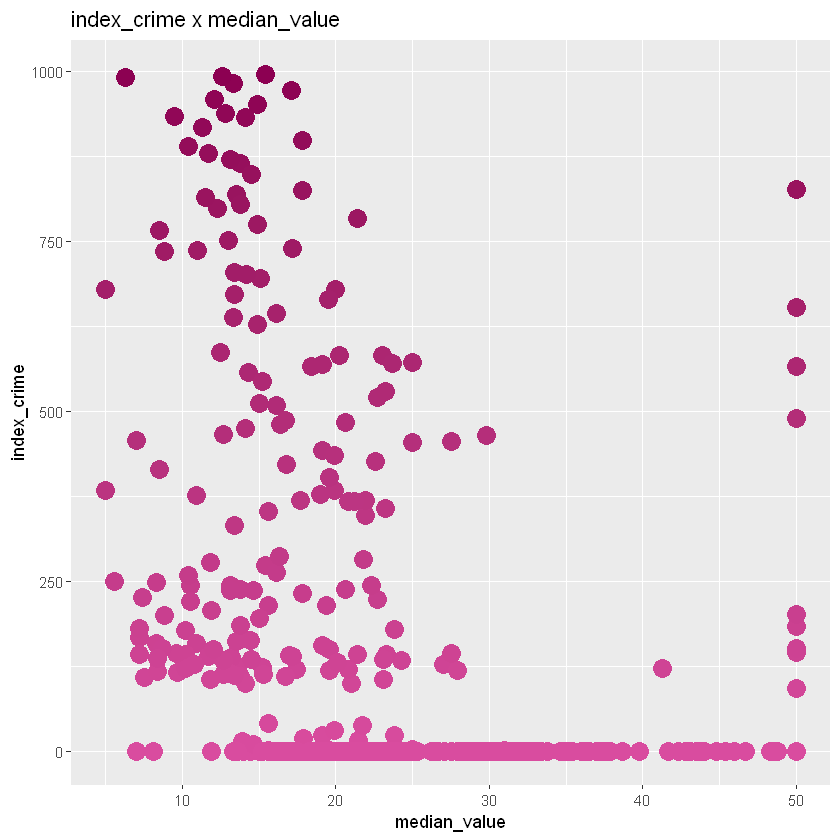

In [79]:
ggplot(dataReglin) +
  aes(x = median_value
      ,y = index_crime
      ,color = index_crime) +
   geom_point(size = 5
             ,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "index_crime x median_value " )

In [78]:
cor.test(dataReglin$median_value, dataReglin$index_crime)


	Pearson's product-moment correlation

data:  dataReglin$index_crime and dataReglin$median_value
t = -7.6458, df = 504, p-value = 1.059e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3983616 -0.2420203
sample estimates:
       cor 
-0.3223877 


La correlación muestral es 0.3223877, cambios en una variable 'median_value' no están relacionados de manera sistemática con los cambios en 'index_crime'

Las suposiciones restantes se comprobarán después de ajustar el modelo.

In [86]:
set.seed(123)
indice_entrenamiento <- sample(seq_len(nrow(dataReglin)), size = 0.8 * nrow(dataReglin))
conjunto_entrenamiento <- dataReglin[indice_entrenamiento, ]
conjunto_prueba <- dataReglin[-indice_entrenamiento, ]

In [87]:
modelo_lm = lm(index_crime ~ median_value , data = conjunto_entrenamiento) # Entrenamos el modelo
summary(modelo_lm)


Call:
lm(formula = index_crime ~ median_value, data = conjunto_entrenamiento)

Residuals:
    Min      1Q  Median      3Q     Max 
-257.42 -138.41  -94.42   13.38  929.66 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   316.293     30.630  10.326  < 2e-16 ***
median_value   -8.385      1.260  -6.656 9.27e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 232.7 on 402 degrees of freedom
Multiple R-squared:  0.09926,	Adjusted R-squared:  0.09701 
F-statistic:  44.3 on 1 and 402 DF,  p-value: 9.265e-11


In [88]:
resumen_modelo = summary(modelo_lm)
resumen_modelo$r.squared
resumen_modelo$sigma #Residual standard error
attributes(modelo_lm)
modelo_lm$coefficients

[1] 0.09925531

[1] 232.6599

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

(Intercept) median_value 
  316.292948    -8.384569

In [89]:
modelo_lm$residuals

415          463          179           14          195          426 
 199.8600364  512.6981509  -65.5279099 -144.6179769  -72.2875952  -88.0980237 
         306          118          299          229          244          503 
 -78.1163936 -155.1582399 -127.5754817   75.5646219 -117.4510887 -143.5255531 
         374          153           90           91          256          197 
 -89.5048933  -75.3510396  -75.6027929 -126.7548448 -141.0199723  -37.0466848 
         491          441          348          137          477          355 
-248.1704775   -7.7439715 -122.5907002 -170.0788044  310.8703572 -163.6507790 
         328           26            7          501          485          254 
-129.9144824 -198.9068964 -124.1980240 -175.2078059   94.2861769   42.9355522 
         211          420           78           81           43          359 
-134.1733370 -127.7395668 -141.8068392  -81.4838813 -104.0218480  394.2137722 
         373          332          143           32          109          263 
 929.6605101 -172.8665851  128.1652790  -59.2446949 -150.1504584   93.3941671 
         393          425          330           23          411          444 
-119.1836269  661.0185114 -126.7344448  -65.6004965  320.8335897  809.4834173 
         309          135          458          460          224          166 
-124.6317909 -184.5174988  616.9567359  531.5154354  -63.3027161 -103.7547188 
         217          290           69           72           76           63 
-120.8868863 -108.3126626 -170.2659044 -134.1890370 -136.7680477 -130.0452424 
         141          210          353          347          493          294 
-198.6180795 -148.1658546 -160.2675214 -172.0167382 -147.6517876 -115.8190949 
         277           41          431          492          316          223 
 -37.8205617  -23.6378941  654.4963051 -202.1570672 -180.2093674  -85.0937359 
          16          116           94          262          235           86 
-148.8126315 -162.6839921 -106.6499688   45.6161029  -72.6925322  -93.2060581 
         342           39          159          240          209          494 
 -42.1045263 -109.0190395   21.7360828 -120.8399663 -111.5735903 -133.3360301 
         500           34            4           13          450          383 
-169.3851574  -91.2830917  -36.2159679 -134.2540170  545.3074513  697.1546838 
         243          409          308          278           89           25 
-130.0526124  568.3106418  -79.7987775  -38.7024386 -118.3605156 -184.7434088 
         291          368          286          396          479          121 
 -77.2977067   12.6125998 -131.8214662  665.2199083 -183.6452380 -131.7634362 
         110          158           64          398          199           67 
-153.3686761  152.3477585 -106.5522188  522.1778901  -26.1491749 -153.5885161 
         151          378          335           85          165          136 
-119.4587108  777.5708221 -142.6949861 -115.8511549   98.2727722 -163.9744660 
          51           74          178          362          236           98 
-151.0282053 -119.8986394 -109.9782964  234.2439785 -114.7328379    8.3107087 
         462          214          127          212          174          273 
 201.4249264  -80.5460344 -184.2678619 -154.0949830 -118.3253356 -111.5948603 
         302          310          232          366          416          350 
-131.7970562 -145.7367938  -50.0391454  369.8697041  -75.0780498  -93.2344181 
         407          280          113          107          401          154 
  -9.3545747  -21.7841903 -158.5397575 -152.6226491  -18.8783604   61.2856939 
         102          255          160          155            5          326 
 -93.9875450 -132.6226932   21.5695137  -32.3702720  -12.7024942 -109.8406864 
         272          470          288          440           55          331 
-104.8396949  -17.0121076 -121.7322333  730.0925375 -157.8109906 -150.2330384 
         238          252          339          427        

In [90]:
modelo_lm$fitted.values

415         463         179          14         195         426 
 257.600964  152.793849   65.594330  145.247737   72.301985  246.701024 
        306         118         299         229         244         503 
  78.171184  155.309220  127.640142  -75.266432  117.578659  143.570823 
        374         153          90          91         256         197 
 200.585893  188.009040   75.655813  126.801685  141.055452   37.086795 
        491         441         348         137         477         355 
 248.377938  228.254972  122.609400  170.401444  176.270643  163.693789 
        328          26           7         501         485         254 
 130.155512  199.747436  124.286314  175.432186  143.570823  -42.566612 
        211         420          78          81          43         359 
 134.347797  245.862567  141.893909   81.525011  104.163348  125.963228 
        373         332         143          32         109         263 
-102.935510  172.916815  203.939721  194.716695  150.278478  -92.874027 
        393         425         330          23         411         444 
 234.962627  218.193489  126.801685  188.847497  190.524410  187.170583 
        309         135         458         460         224         166 
 125.124771  185.493669  203.101264  148.601565   63.917416  106.678719 
        217         290          69          72          76          63 
 120.932486  108.355633  170.401444  134.347797  136.863168  130.155512 
        141         210         353         347         493         294 
 198.908979  148.601565  160.339961  172.078358  147.763108  115.901745 
        277          41         431         492         316         223 
  37.925252   23.671484  194.716695  202.262807  180.462927   85.717296 
         16         116          94         262         235          86 
 149.440021  162.855332  106.678719  -45.081983   73.140442   93.263408 
        342          39         159         240         209         494 
  42.117536  109.194090  112.547917  120.932486  111.709460  133.509340 
        500          34           4          13         450         383 
 169.562987  206.455092   36.248338  134.347797  207.293549  221.547316 
        243         409         308         278          89          25 
 130.155512  172.078358   79.848097   38.763709  118.417116  185.493669 
        291         368         286         396         479         121 
  77.332727  122.609400  131.832426  206.455092  193.878238  131.832426 
        110         158          64         398         199          67 
 153.632306  -29.989758  106.678719  245.024110   26.186855  153.632306 
        151         378         335          85         165         136 
 136.024711  204.778178  142.732366  115.901745  125.963228  164.532246 
         51          74         178         362         236          98 
 151.116935  120.094029  110.032546  149.440021  115.063288   -8.189879 
        462         214         127         212         174         273 
 167.886074   80.686554  184.655212  154.470763  118.417116  111.709460 
        302         310         232         366         416         350 
 131.832426  146.086194   50.502105   85.717296  255.924050   93.263408 
        407         280         113         107         401         154 
 216.516575   21.994570  158.663048  152.793849  269.339360  153.632306 
        102         255         160         155           5         326 
  94.101865  132.670883  120.932486  173.755272   12.771544  110.032546 
        272         470         288         440          55         331 
 105.001805  147.763108  121.770943  208.970462  157.824591  150.278478 
        238         252         339         427         379         478 
  52.179019  108.355633  143.570823  230.770342  206.455092  215.678118 
        226          48          77          83         184         459 
-102.935510  177.109100  148.601565  108.355633   43.794450  191.362867 
        196         257         168         408         432       

### <font color='#ED45A6'>  3.4 COMPROBAMOS EL RESTO DE SUPUESTOS: </font>


### <font color='#ED45A6'>  ***Normalidad:*** </font>

- Visualización: Q-Q Plot de residuos.
- Prueba estadística: la prueba de Shapiro-wilk sobre los residuos (muestras con pocas observaciones).

H0: La variable presenta una distribución normal
<br>
H1: La variable presenta una distribución no normal


Sig(p valor) > 0.05: No rechazar H0 (normal)
<br>
Sig(p valor) < 0.05: Rechazar H0


	Shapiro-Wilk normality test

data:  modelo_lm$residuals
W = 0.71705, p-value < 2.2e-16


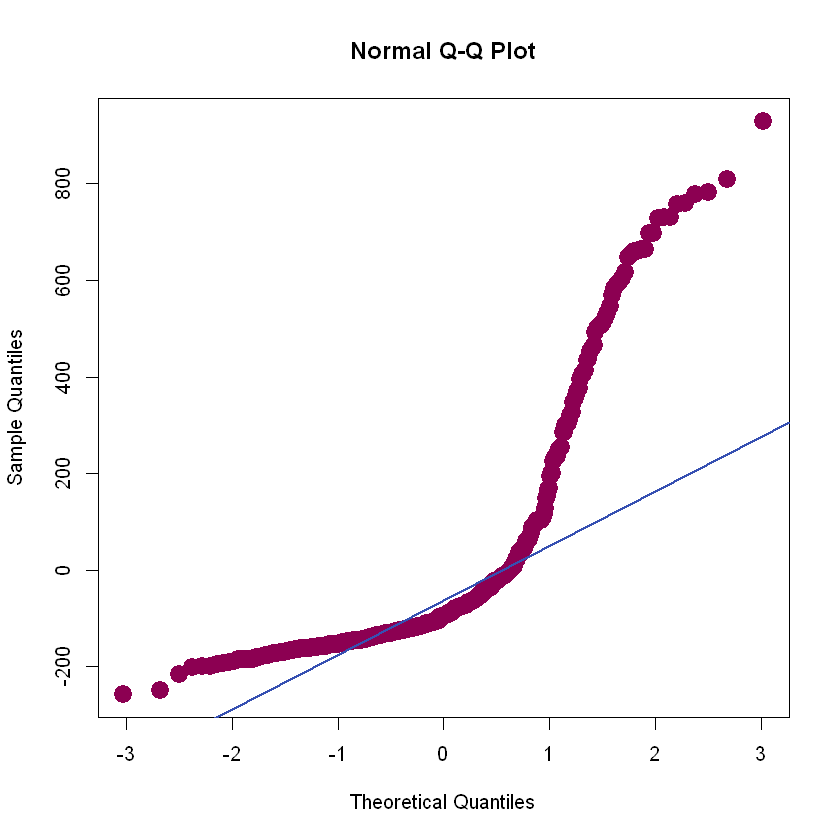

In [91]:
# Visualization
qqnorm(modelo_lm$residuals,pch =19,col ="#8c0052", cex=2)
qqline(modelo_lm$residuals , col = "#3650b2", lwd = 2 )  

# Statistical Test
shapiro.test(modelo_lm$residuals)

### <font color='#ED45A6'>  ***Homocedasticidad:*** </font>

- Visualización: Residuos vs valores ajustados.

- Prueba estadística: la prueba de Breusch Pagan


	studentized Breusch-Pagan test

data:  modelo_lm
BP = 9.6893, df = 1, p-value = 0.001853


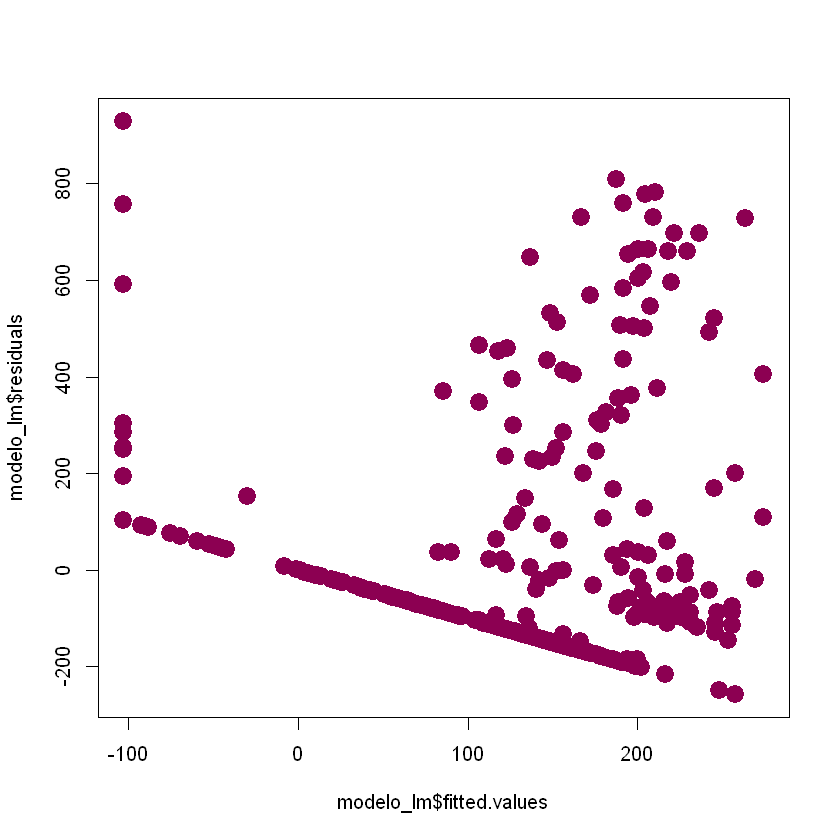

In [95]:
# Visualization
plot(modelo_lm$fitted.values , modelo_lm$residuals , pch =19,col ="#8c0052", cex=2 )

# Test Breusch-Pagan
bptest(modelo_lm)

### <font color='#ED45A6'>  ***Autocorrelación:*** </font>

- Visualización: Residual vs Orden de toma de observaciones.
- Prueba estadística: la prueba de Durbin-Watson.

In [98]:
# Calcular la media de errores
mean(modelo_lm$residuals)

[1] 6.620617e-15

Dado que el valor p (0.001853)< 0.05, por lo tanto, rechazo la hipótesis nula, es decir, los errores no tienen varianza constante.

No han cumplido todos los supuestos de la regresión lineal simple.

### <font color='#ED45A6'>  ***Detección de Outliers:*** </font>

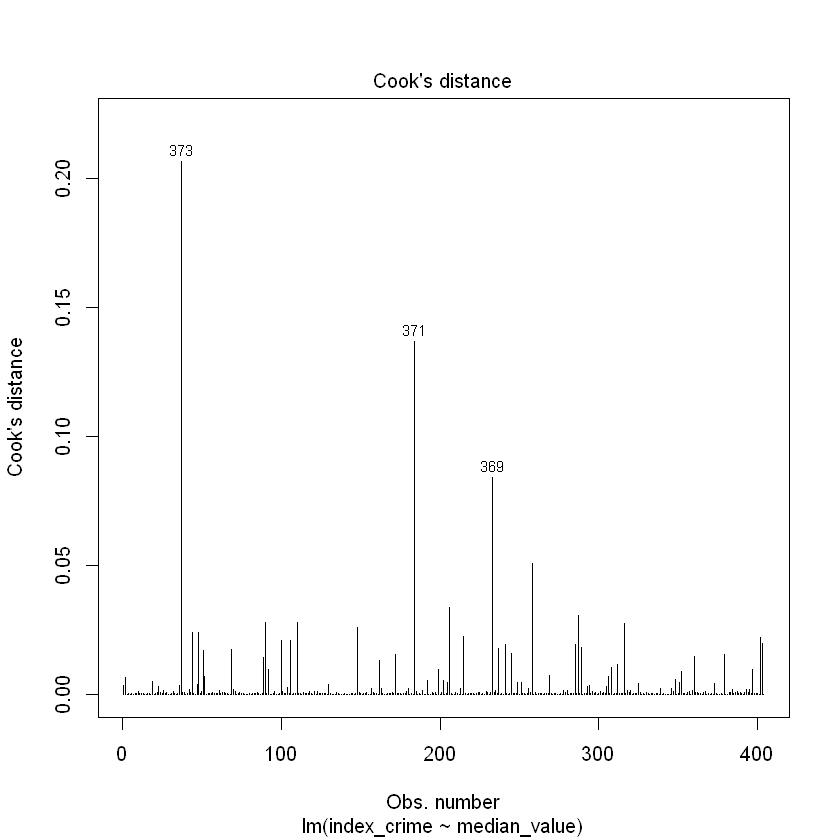

In [105]:
# Visualization (Cook's distance plot)
plot(modelo_lm , 4)

## <font color='#ED45A6'>  4. VALIDACIÓN DE NUESTRO MODELO </font>

R2,RMSE,MAE
<dbl>,<dbl>,<dbl>
0.124192,236.8952,167.4425


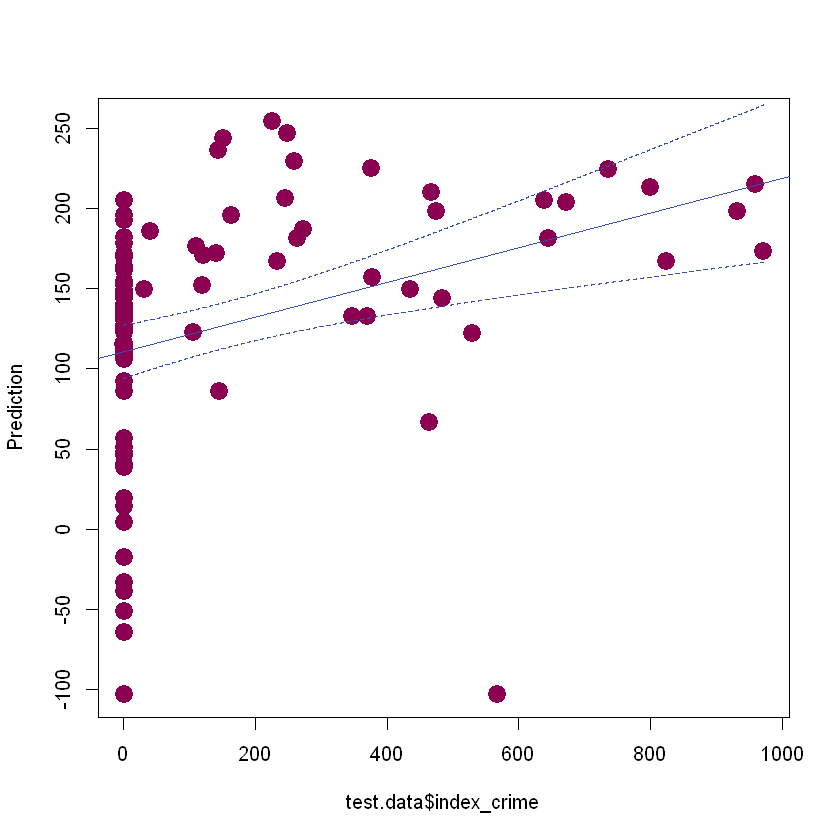

In [110]:
# Making prediction
prediction = predict(modelo_lm, conjunto_prueba)

### Visualization
plot(conjunto_prueba$index_crime, prediction, xlab="test.data$index_crime", ylab="Prediction", pch =19,col ="#8c0052", cex=2)

#add fitted regression line
lm.out = lm(prediction ~ index_crime, data = conjunto_prueba)
newx = seq(min(conjunto_prueba$index_crime),max(conjunto_prueba$index_crime),by = 0.05)
conf_interval = predict(lm.out, newdata=data.frame(index_crime=newx), interval="confidence", level = 0.95)
abline(lm.out, col = "#3650b2")

#add conf_interval lines
lines(newx, conf_interval[,2], col="#3650b2", lty=2)
lines(newx, conf_interval[,3], col="#3650b2", lty=2)

# Statistical Measure
data.frame( R2 = R2(prediction, conjunto_prueba$index_crime),
            RMSE = RMSE(prediction, conjunto_prueba$index_crime),
            MAE = MAE(prediction, conjunto_prueba$index_crime))

**R2:** se obtiene un 0.124192, esto significa que cerca del 12% de la variabilidad de mi variable respuesta 'index_crime' es explicada por el modelo. Al ser un valor lejano a 1 nos indica un mal ajuste del modelo.

**RMSE - Error Cuadrático Medio:** en promedio, las predicciones difieren alrededor de 236.8952 unidades de la variable de respuesta.

**MAE - Error Absoluto Medio:** este indicador es la media de las diferencias absolutas entre las predicciones y los valores reales. Inferior al RMSE, la diferencia media entre variable respuesta y predicción es de 167.4425. 

## <font color='#ED45A6'> CONCLUSIONES </font>


ANÁLISIS DESCRIPTIVO

El dataset se compone de 506 observaciones y 14 variables donde no se encontró ningún valor Null pero si tuvimos que cambiar algunas variables de double a integer porque no tenía lógica el formato. En dos variables encontramos media cero y la variable 'c_river_variable’ es una variable categórica de valores 0 y 1.  

Respecto al análisis descriptivo y teniendo en cuenta las visualizaciones (histogramas y boxplots) sacamos las siguientes conclusiones para cada variable:

· crime_index: Índice de criminalidad de la zona

La variable objetivo tiene un rango de cero a 100, que sería el índice de criminalidad. Observando el histograma vemos que la mayoría de los datos se encuentran en el índice cero. En el boxplot vemos que los outliers están después de un índice de 375 aproximadamente. No parece una distribución normal.

· urban_ratio: Ratio de zona urbana residencial sobre el total

Observando el histograma no parece una distribución normal. Vemos que la mayoría de los datos se encuentran en el índice cero. En el boxplot vemos que los outliers están después de un ratio de 27 aproximadamente.

· c_river_variable: 1 si la zona colinda con un río y 0 si no

La mayoría de los datos corresponden a la zona que no colinda con el rio y vemos un punto outlier en el boxplot.

· nox_concentration: Concentración de óxido nitroso en la zona

Presenta un histograma que muestra la mayoría de los datos (concentración de óxido nitroso) están entre 0.4490 y 0.6240, no se observan outliers y tiene una apariencia más cercana a la normal.

· industry_ratio: Ratio de industria de la zona

observando el histograma vemos que la mayoría de los datos se encuentran en el índice cero y presenta outliers.

· rooms_per_dwelling: Número de habitaciones medio por vivienda

Tiene una distribución normal y Media de 6, en el boxplot observamos un outlier en la parte superior y otro en la parte inferior. 

· dwelling_age: “Edad” media de la vivienda

El histograma muestra una distribución simétrica a la izquierda con una media de edad de la vivienda de 77 años y no presenta outliers en el boxplot.

· dwelling_dist: Distancia media ponderada con los centros urbanos de la ciudad

Tiene una distribución simétrica a la derecha y aparecen outliers en la distancia superior con una media cercana al 27.

· highway_index: Índice de accesibilidad sobre autopistas cercanas

La mayoría de los datos se ubican en el índice 25 con una media de 5. No presenta outliers en el boxplot.

· tax_ratio: Índice de tasas por cada 10000usd

En el histograma la mayoría de los datos se ubican en el índice 408. presenta outliers en el boxplot.

· teacher_ratio: Ratio de alumno por profesor

En el histograma observamos que en los ratios de alumno por profesor no existen valores después del 12,5 hasta el 15 y hay pico de datos en 20, en el boxplot observamos dos outliers en el limite inferior

· racial_index: Índice de proporción de población no caucásica

Observamos la mayor cantidad de los datos en 391.44 en el histograma.

· lower_status: Porcentaje de población de “clase-baja”

En el histograma observamos una asimetría a la izquierda y con una Median 11.36, a la izquierda del boxplot observamos outliers

· median_value: Valor medio de precio de la vivienda (En 1000USD)

Observamos en el histograma una Media de 21.20 y una distribución normal. En el boxplot vemos outliers en ambos extremos. 


ANÁLISIS CORRELACIÓN y PCA 

En el análisis de correlación observamos una correlación alta de la variable Objetivo “crime_index” y las variables independientes highway_index=0.767 Y tax_ratio = 0.727

En el análisis PCA en total tenemos 14 componentes y en tabla "Importance of components" observamos que el componente 1 retiene la mayor cantidad posible de variabilidad en los datos, agrupa un 45.6% de variación. Poteriormente, en la tabla "Loadings" las variables que tienen mayor peso son: industry_ratio, nox_concentration, highway_index, tax_ratio y lower_status.

En el gráfico PCA observamos claramente que resalta la componente 1 y en la matriz observamos que el 69.69% de la varianza es explicada por la componente 1. 

En el MODELO LINEAL MULTIPLE teniendo en cuenta la más alta correlación de las Variables seleccionadas por PCA, elegimos 'highway_index' y 'tax_ratio' para entrenar el modelo y obtenemos la R-cuadrado 0.578 que aunque no es tan cercana a 1, nos sirve, porque la naturaleza de los datos no nos proporcional más correlación. El modelo está medianamente ajustando a los datos y es capaz de predecir de alguna manera la variable dependiente.

Análisis de ANOVA

Como la única variable categórica que podemos separar grupalmente es 'c_river_variable', hicimos el análisis para determinar si hay diferencias significativas entre las medias de los grupos 'la criminalidad de la zona que colinda con un río 'y 'la criminalidad de la zona que no colinda con un río'. Después de realizado el análisis concluimos que hay diferencias significativas entre las medias de los grupos mencionados. 

Tuvimos en cuenta el análisis descriptivo del inicio y la correlación alta con la variable objetivo para elegir las variables a utilizar en nuestro modelo de regresión lineal y el análisis Anova lo hicimos para la práctica. 

Finalmente en el estudio de regresión lineal del median_value los resultados obtenidos fueron insatisfactorios porque no todos los supuestos de normalidad, homoscedasticidad y autocorrelación se cumplen y arrojó un R2 bajísimo lo que indica que es incapaz de predecir, por lo tanto no utilizaría este modelo en la vida real.